In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
import math
import plotly.express as px

In [153]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [154]:
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [156]:
df.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [157]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [158]:
df = df.drop('customer_id', axis = 1)

In [159]:
df = df.drop('balance', axis = 1)

In [280]:
df

credit_score  country  gender  age  tenure  products_number  \
0              619   France  Female   42       2                1   
1              608    Spain  Female   41       1                1   
2              502   France  Female   42       8                3   
3              699   France  Female   39       1                2   
4              850    Spain  Female   43       2                1   
...            ...      ...     ...  ...     ...              ...   
9995           771   France    Male   39       5                2   
9996           516   France    Male   35      10                1   
9997           709   France  Female   36       7                1   
9998           772  Germany    Male   42       3                2   
9999           792   France  Female   28       4                1   

      credit_card  active_member  estimated_salary  churn  
0               1              1         101348.88      1  
1               0              1         112542.58      0  
2               1              0         113931.57      1  
3               0              0          93826.63      0  
4               1              1          79084.10      0  
...           ...            ...               ...    ...  
9995            1              0          96270.64      0  
9996            1              1         101699.77      0  
9997            0              1          42085.58      1  
9998            1              0          92888.52      1  
9999            1              0          38190.78      0  

[10000 rows x 10 columns]

![](https://media.tenor.com/bZiTcK9fAqUAAAAC/palantir-invest-palantir.gif)

# Exploratory Data Analytics

<Axes: >

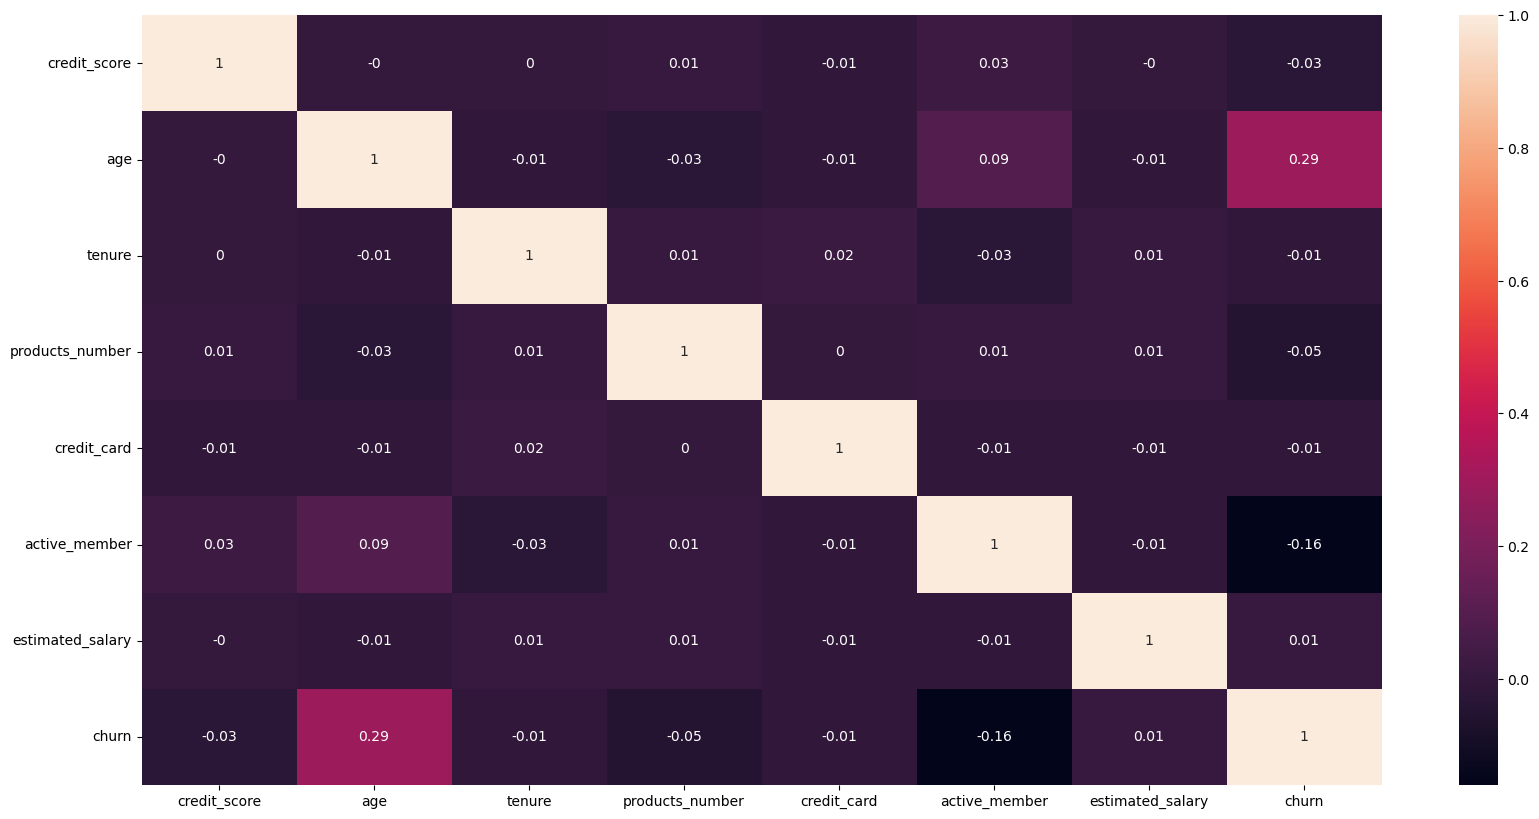

In [161]:
plt.figure(figsize = (20, 10))
sns.heatmap(np.round(df.corr(),2),annot=True)

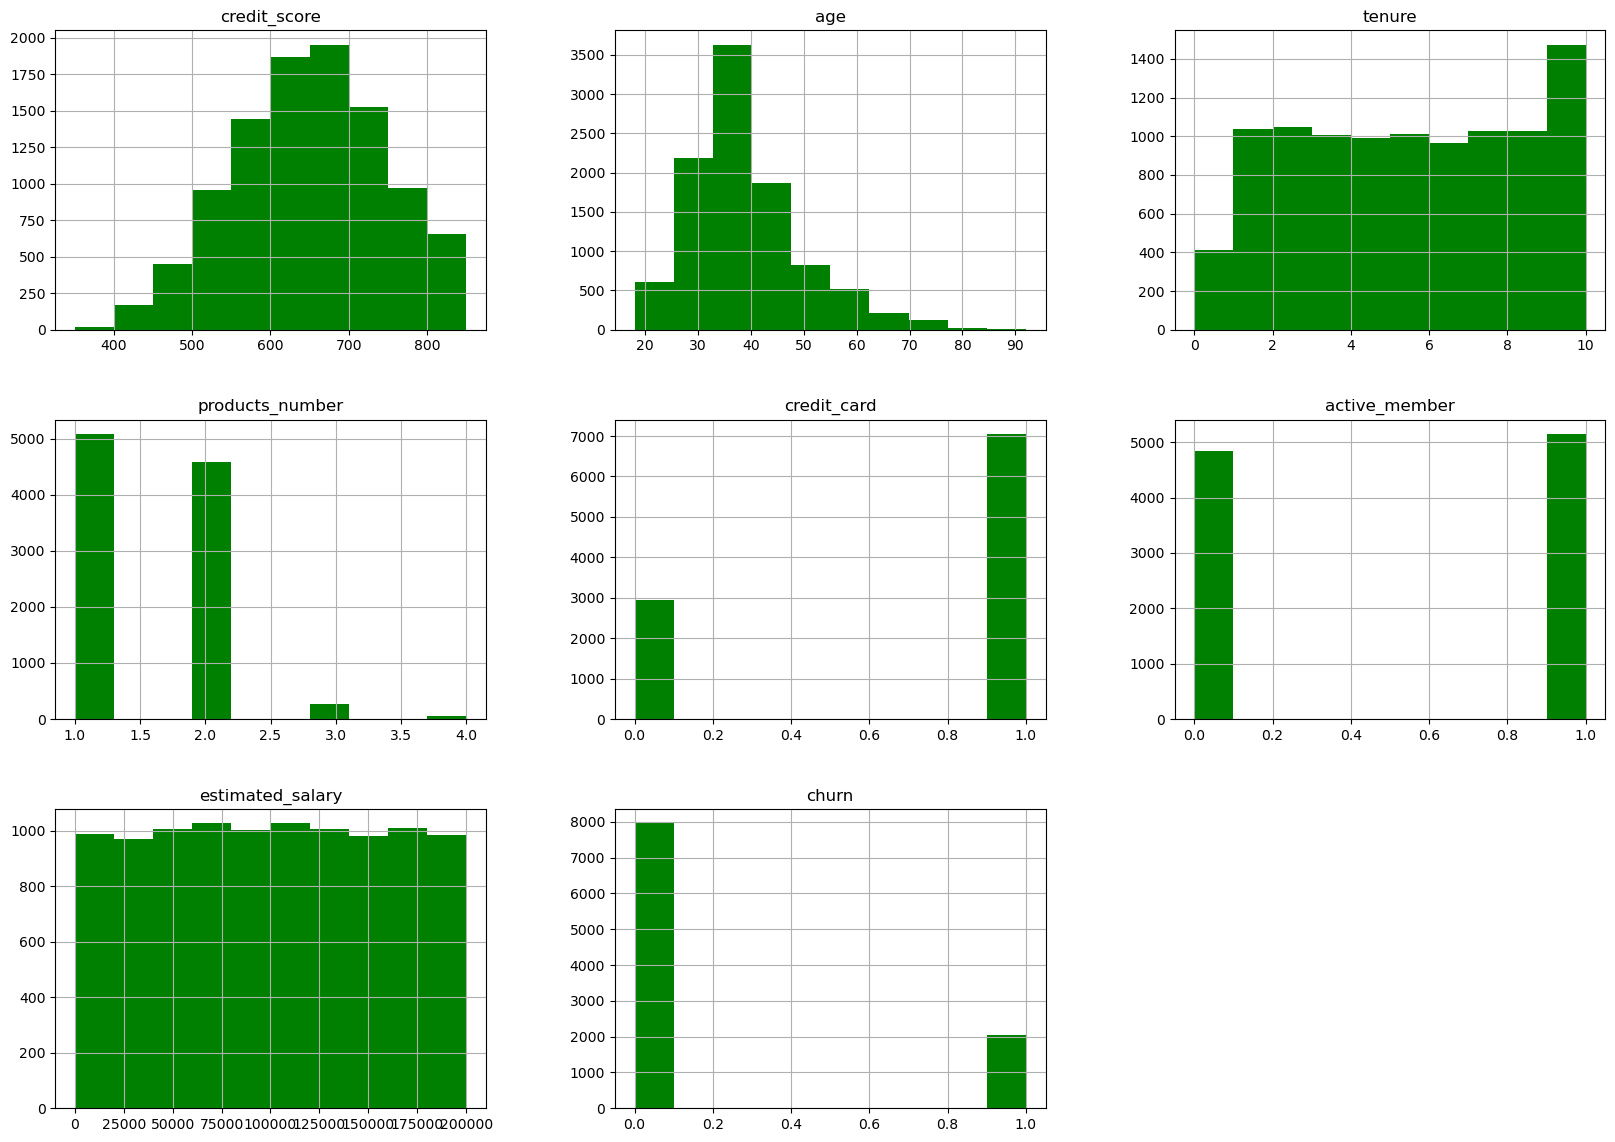

In [162]:
df.hist(figsize=(20,14), color='green')
plt.show()

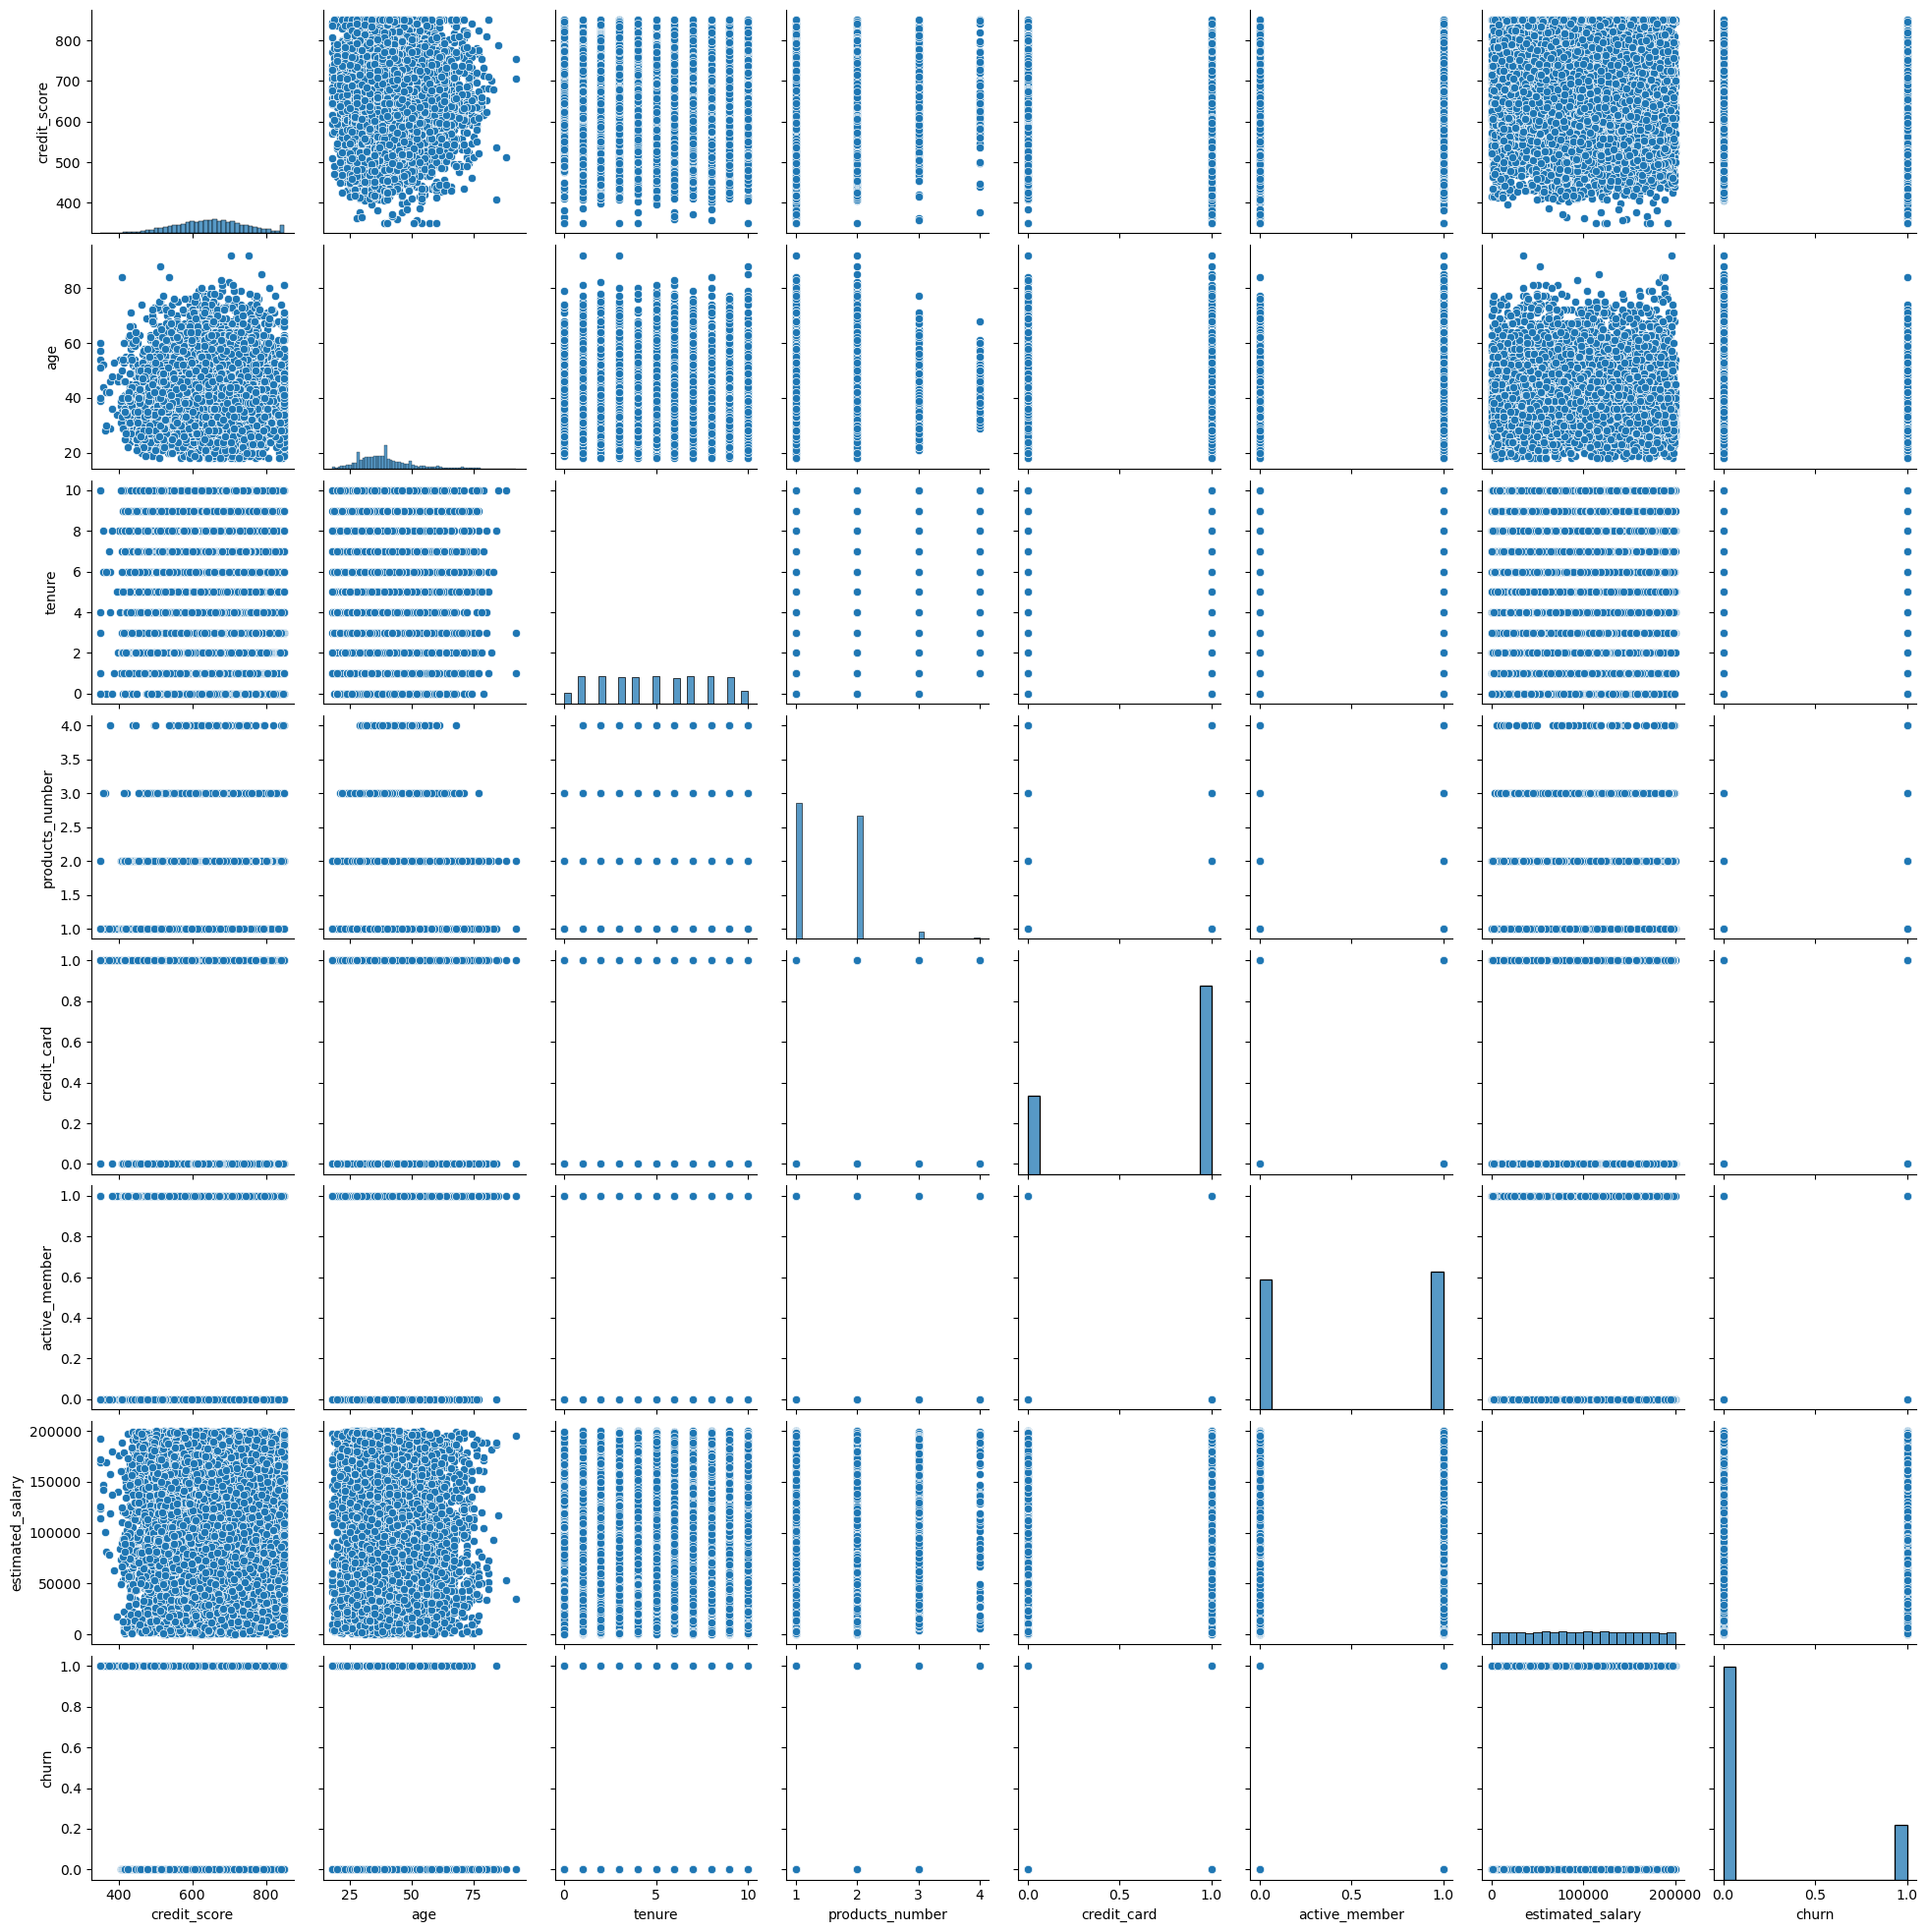

In [163]:
sns.pairplot(df)

# Visualisations and Insights

<Axes: xlabel='estimated_salary', ylabel='Count'>

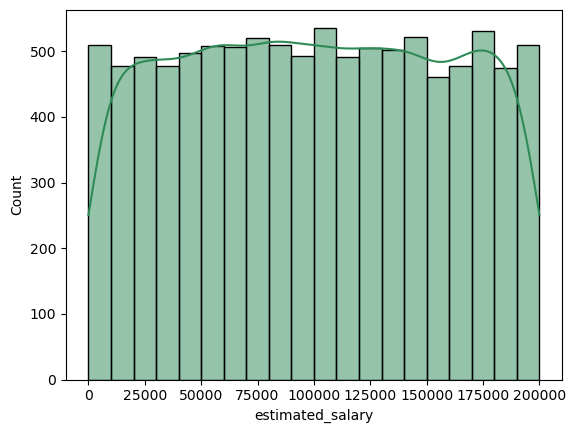

In [173]:
sns.histplot(data=df['estimated_salary'], bins=20, color="seagreen", kde=True)

##  Estimated salary of customers lies between 0 to 2,00,000 with count of most less than 500.

![](https://media.tenor.com/wsyuV8fWHBEAAAAd/money-kaavala-amount.gif)

# ----------------------------------------------------------------------------------------

<Axes: xlabel='age', ylabel='Count'>

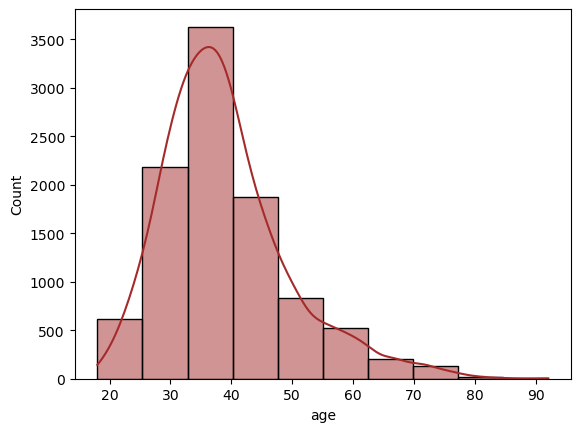

In [175]:
sns.histplot(data=df['age'], bins=10, color="brown", kde=True)

## - Most customers are under the age group 25 - 50 approximately, with maximimum under 30 - 40 age. 

## - There are some outlier customers older than 78.

![](https://media3.giphy.com/media/l0IyajjbNiRvCr7RC/giphy.gif?cid=ecf05e47bpip1pdxs7k5bu0occifbbifxp9wezlvvi865uhp&ep=v1_gifs_search&rid=giphy.gif&ct=g)


# ----------------------------------------------------------------------------------------

<Axes: xlabel='credit_score', ylabel='Count'>

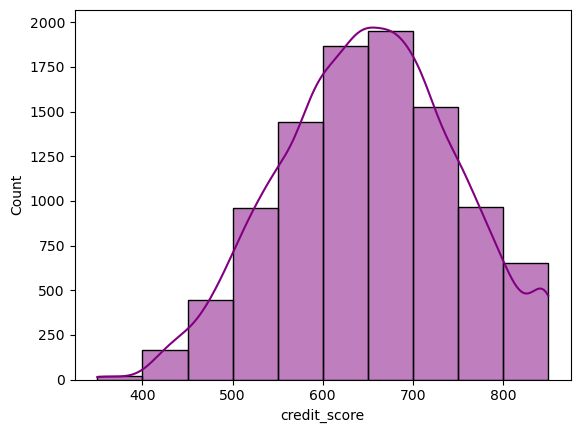

In [179]:
sns.histplot(data=df['credit_score'], bins=10, color="purple", kde=True)

## - The credit score of most customers is in the range of 600 - 700.

## - There are some outlier scores below 400 score.


# ----------------------------------------------------------------------------------------

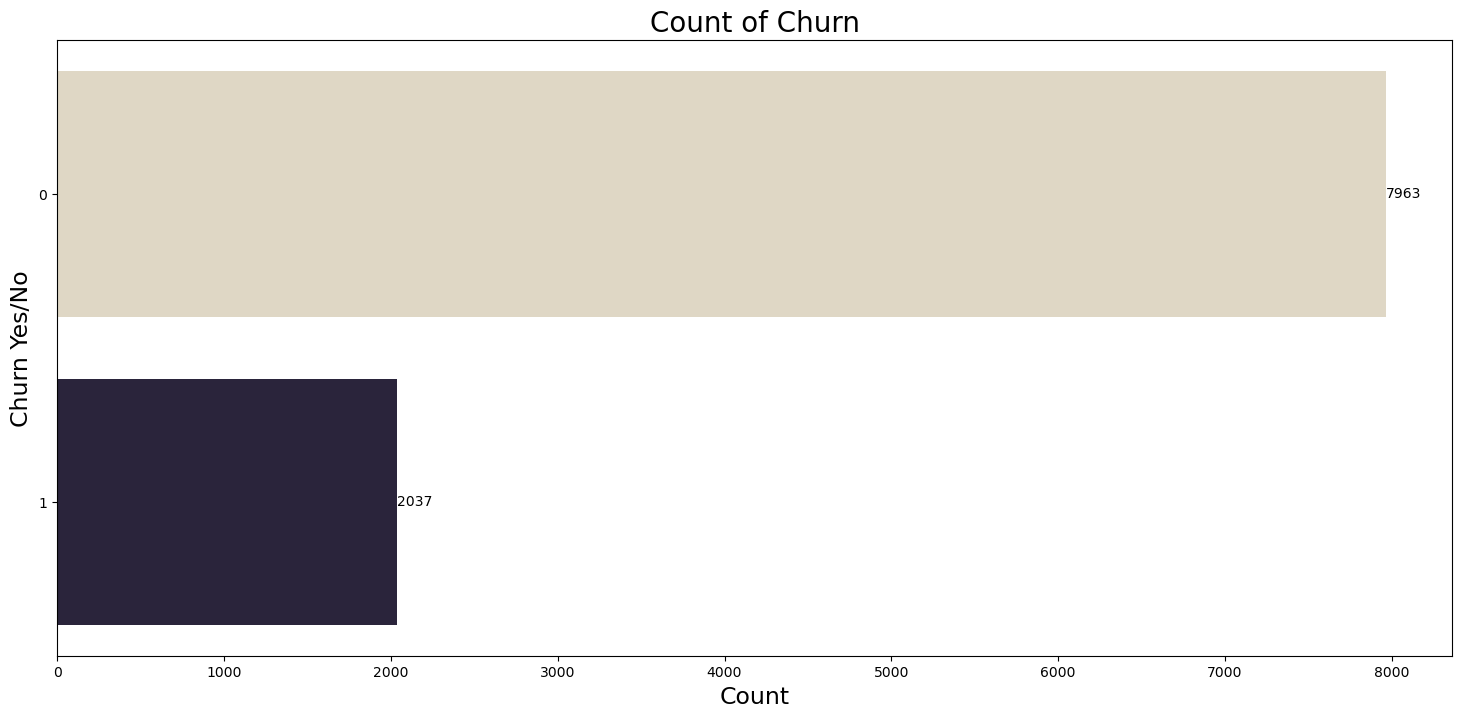

In [231]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(y ='churn', data = df, palette='ch:s=-.2,r=.6')
ax.set_xlabel(xlabel = 'Count', fontsize = 17)
ax.set_ylabel(ylabel = 'Churn Yes/No', fontsize = 17)
ax.set_title(label = 'Count of Churn', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

## Above countplot shows that more than 2k customers have churned. 

![](https://media3.giphy.com/media/flYY2hsOblfZSRkSOp/giphy.gif?cid=ecf05e47c6u5t0y44bbldsnhjy8ryonvvzma5cb45z7pcvq1&ep=v1_gifs_search&rid=giphy.gif&ct=g)

# ----------------------------------------------------------------------------------------

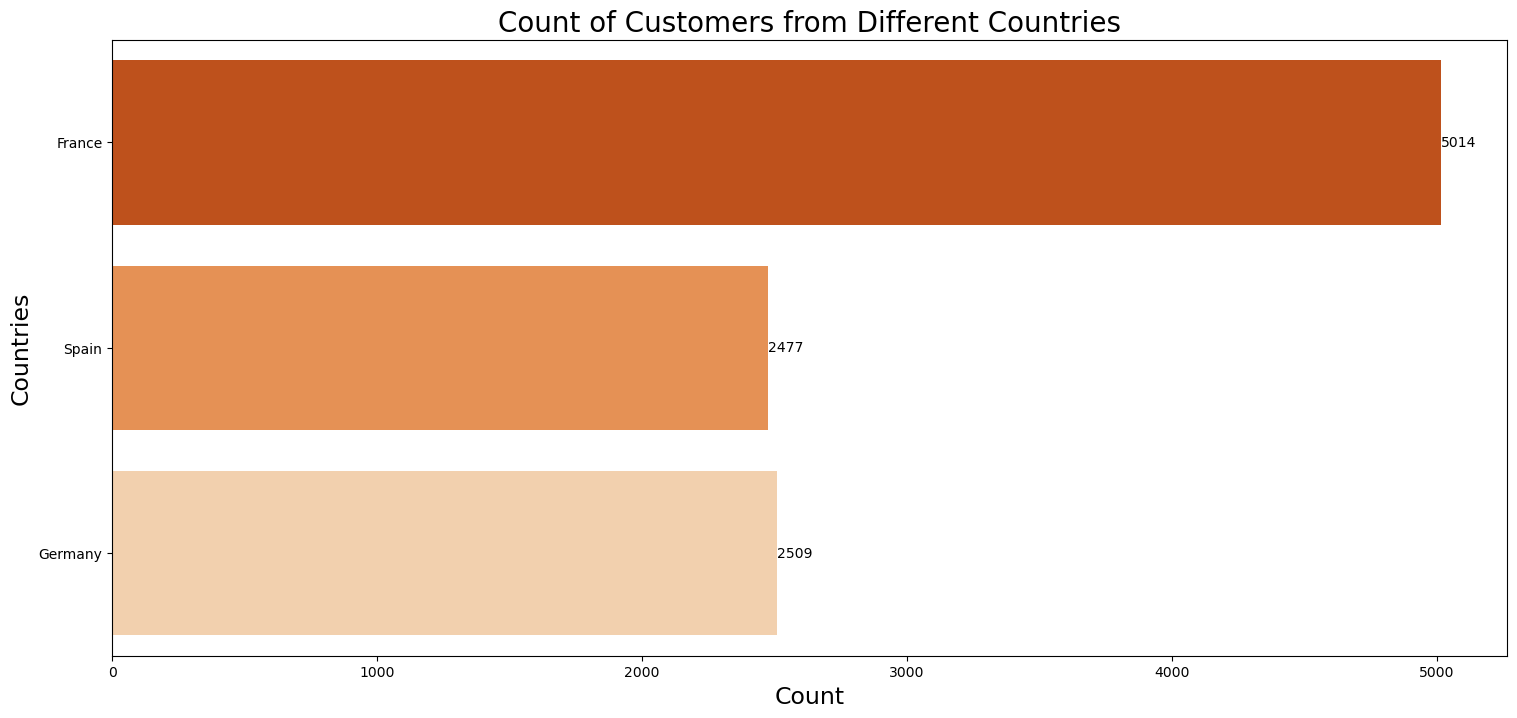

In [205]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(y ='country', data = df, palette='Oranges_r')
ax.set_xlabel(xlabel = 'Count', fontsize = 17)
ax.set_ylabel(ylabel = 'Countries', fontsize = 17)
ax.set_title(label = 'Count of Customers from Different Countries', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

## - Most customers are from France.

## - Spain and germany contribute almost equally to the customer count.

![](https://media3.giphy.com/media/IeX7IzEYkvrXri0fN3/giphy.gif?cid=ecf05e471u3jllrla18qwmrqlev6dkic765j23fvth8il6fh&ep=v1_gifs_search&rid=giphy.gif&ct=g)

# ----------------------------------------------------------------------------------------

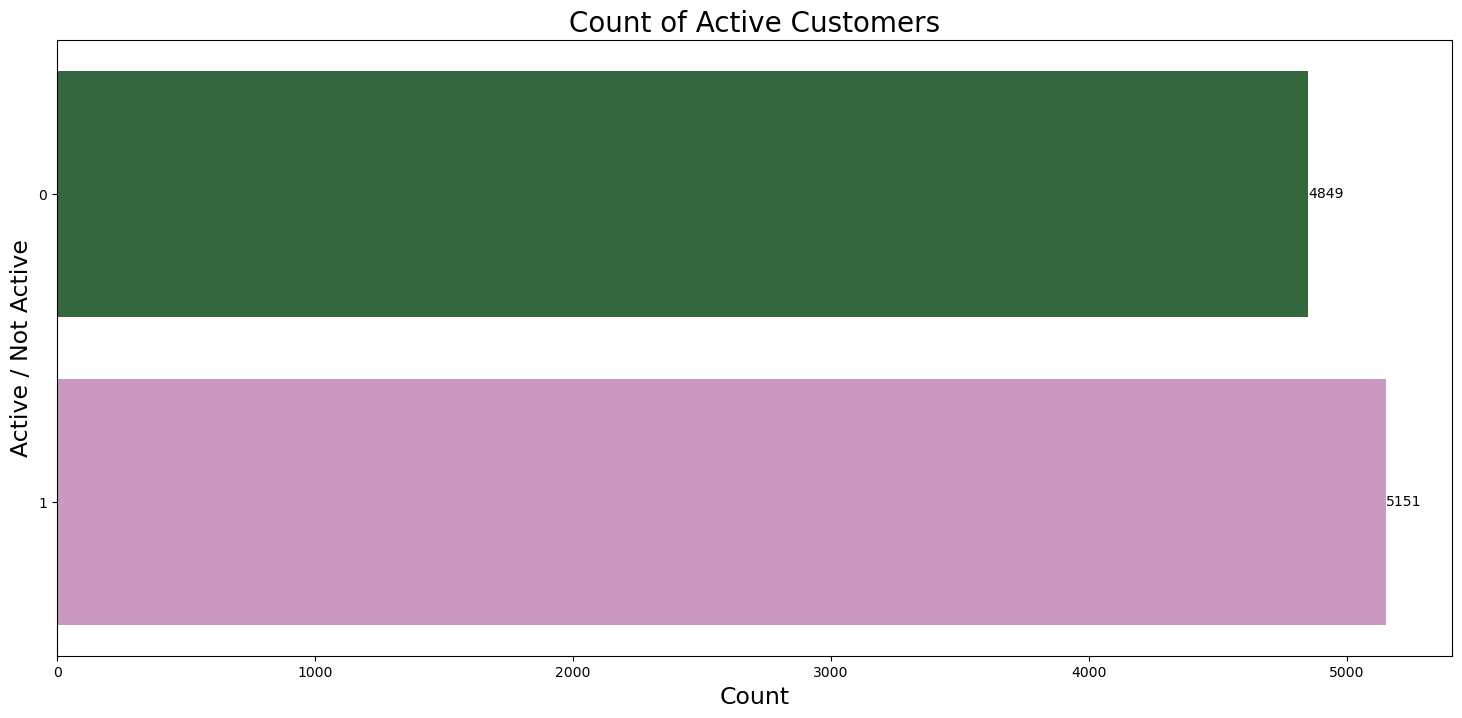

In [221]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(y ='active_member', data = df, palette='cubehelix')
ax.set_xlabel(xlabel = 'Count', fontsize = 17)
ax.set_ylabel(ylabel = 'Active / Not Active', fontsize = 17)
ax.set_title(label = 'Count of Active Customers', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

## Around half the customers are non active members.

# ----------------------------------------------------------------------------------------

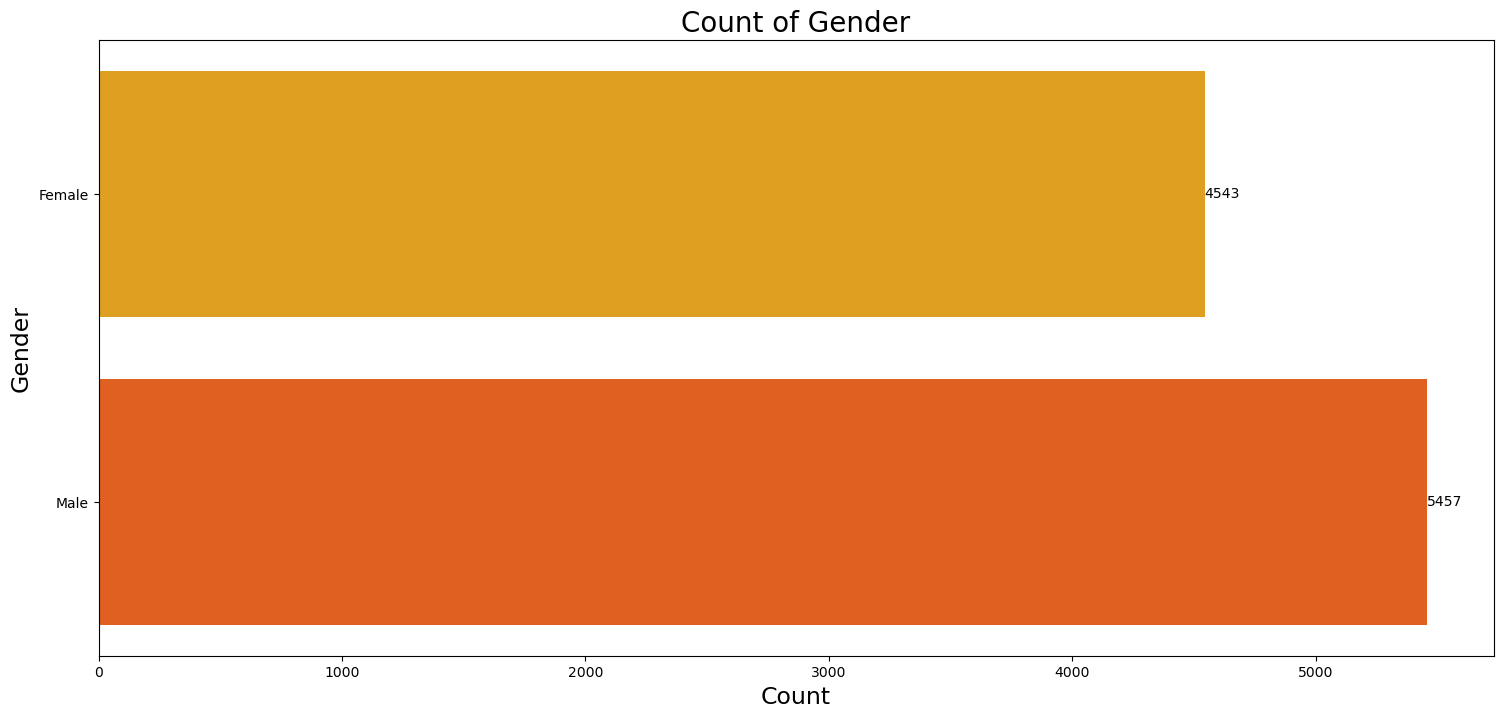

In [220]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(y ='gender', data = df, palette='autumn_r')
ax.set_xlabel(xlabel = 'Count', fontsize = 17)
ax.set_ylabel(ylabel = 'Gender', fontsize = 17)
ax.set_title(label = 'Count of Gender', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

## Approx. difference of 1k is there between number of male and female customers.

# ----------------------------------------------------------------------------------------

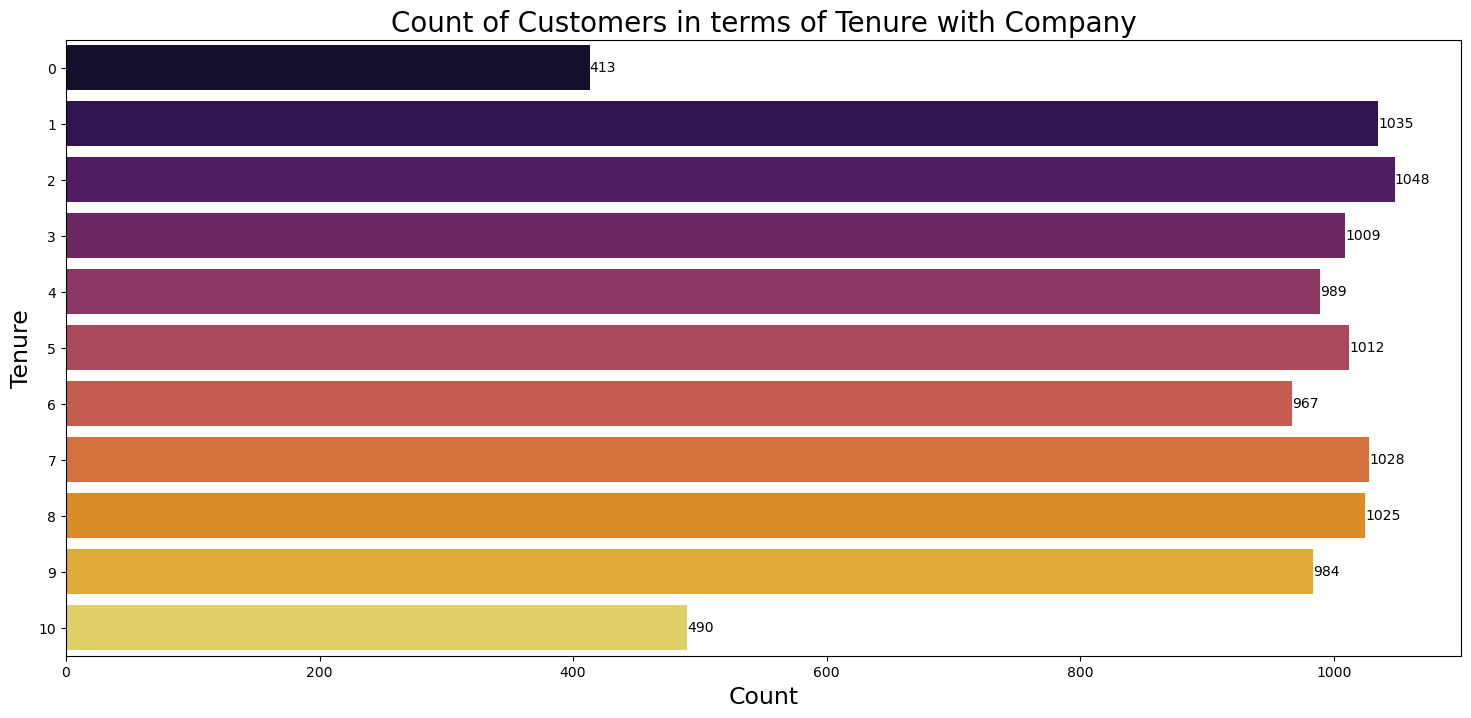

In [228]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(y ='tenure', data = df, palette='inferno')
ax.set_xlabel(xlabel = 'Count', fontsize = 17)
ax.set_ylabel(ylabel = 'Tenure', fontsize = 17)
ax.set_title(label = 'Count of Customers in terms of Tenure with Company', fontsize = 20) 
for i in ax.containers:
    ax.bar_label(i)

## - Count of customers with tenure of 1 and 10 are the least in number.

## - Most Customers have a tenure of 2 years.

# ----------------------------------------------------------------------------------------

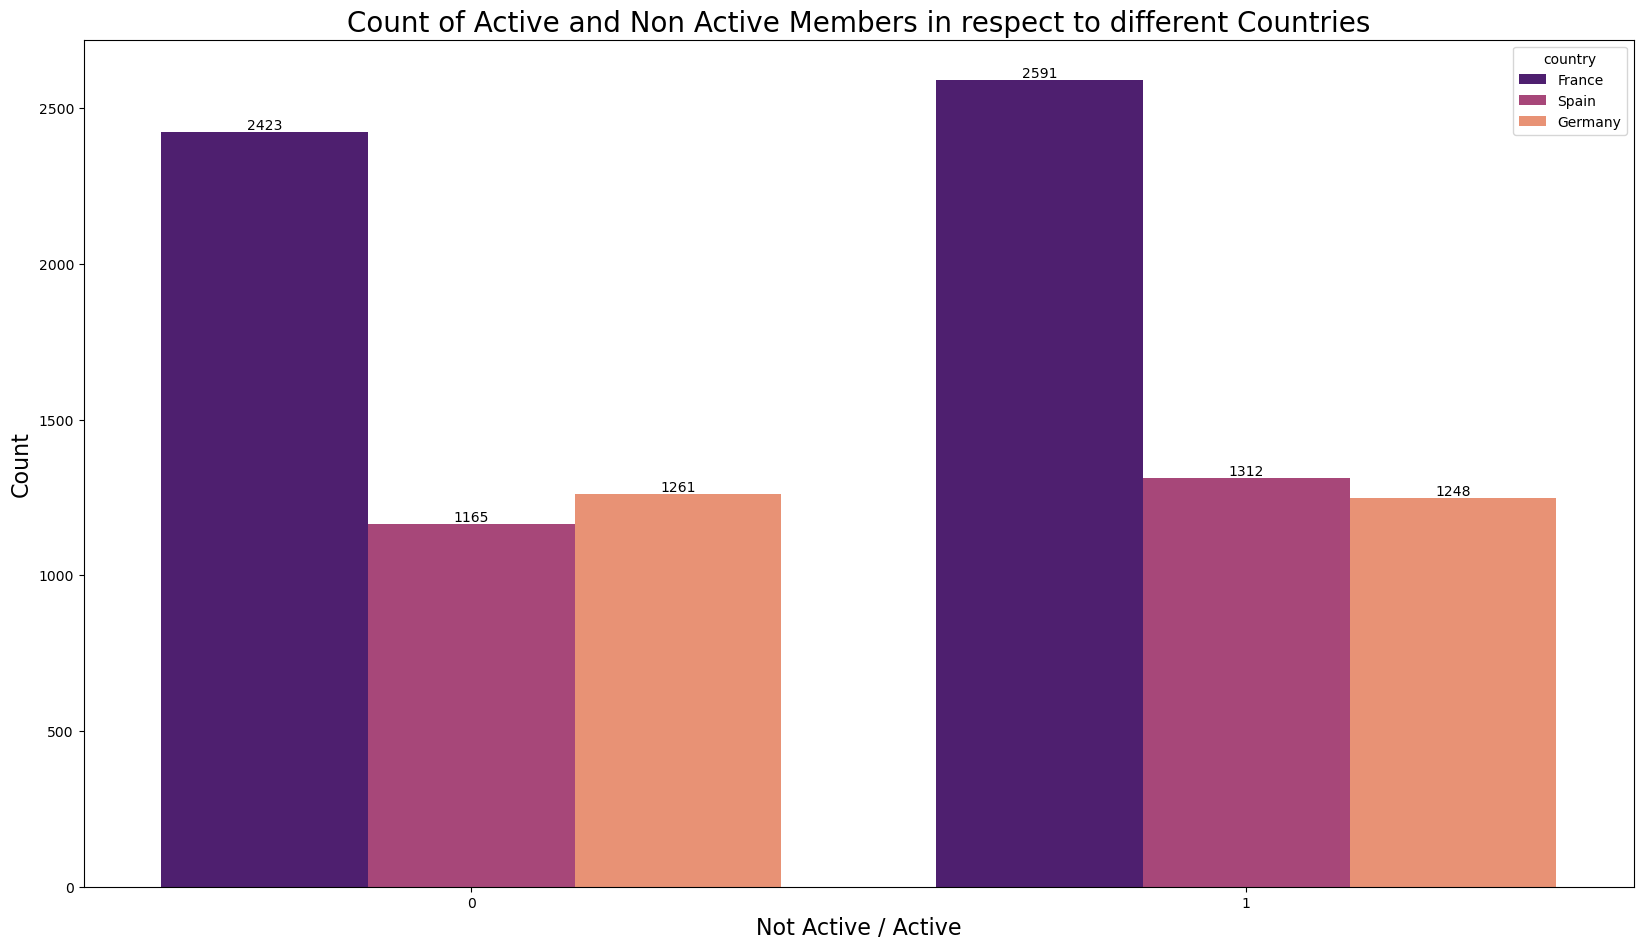

In [215]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='active_member', data = df, hue = "country",palette="magma")
ax.set_xlabel(xlabel = 'Not Active / Active', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of Active and Non Active Members in respect to different Countries', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

## - Most members are Inactive from France as thought of. 

## - Spain is doing better than germany in terms of having more active members. 

# ----------------------------------------------------------------------------------------

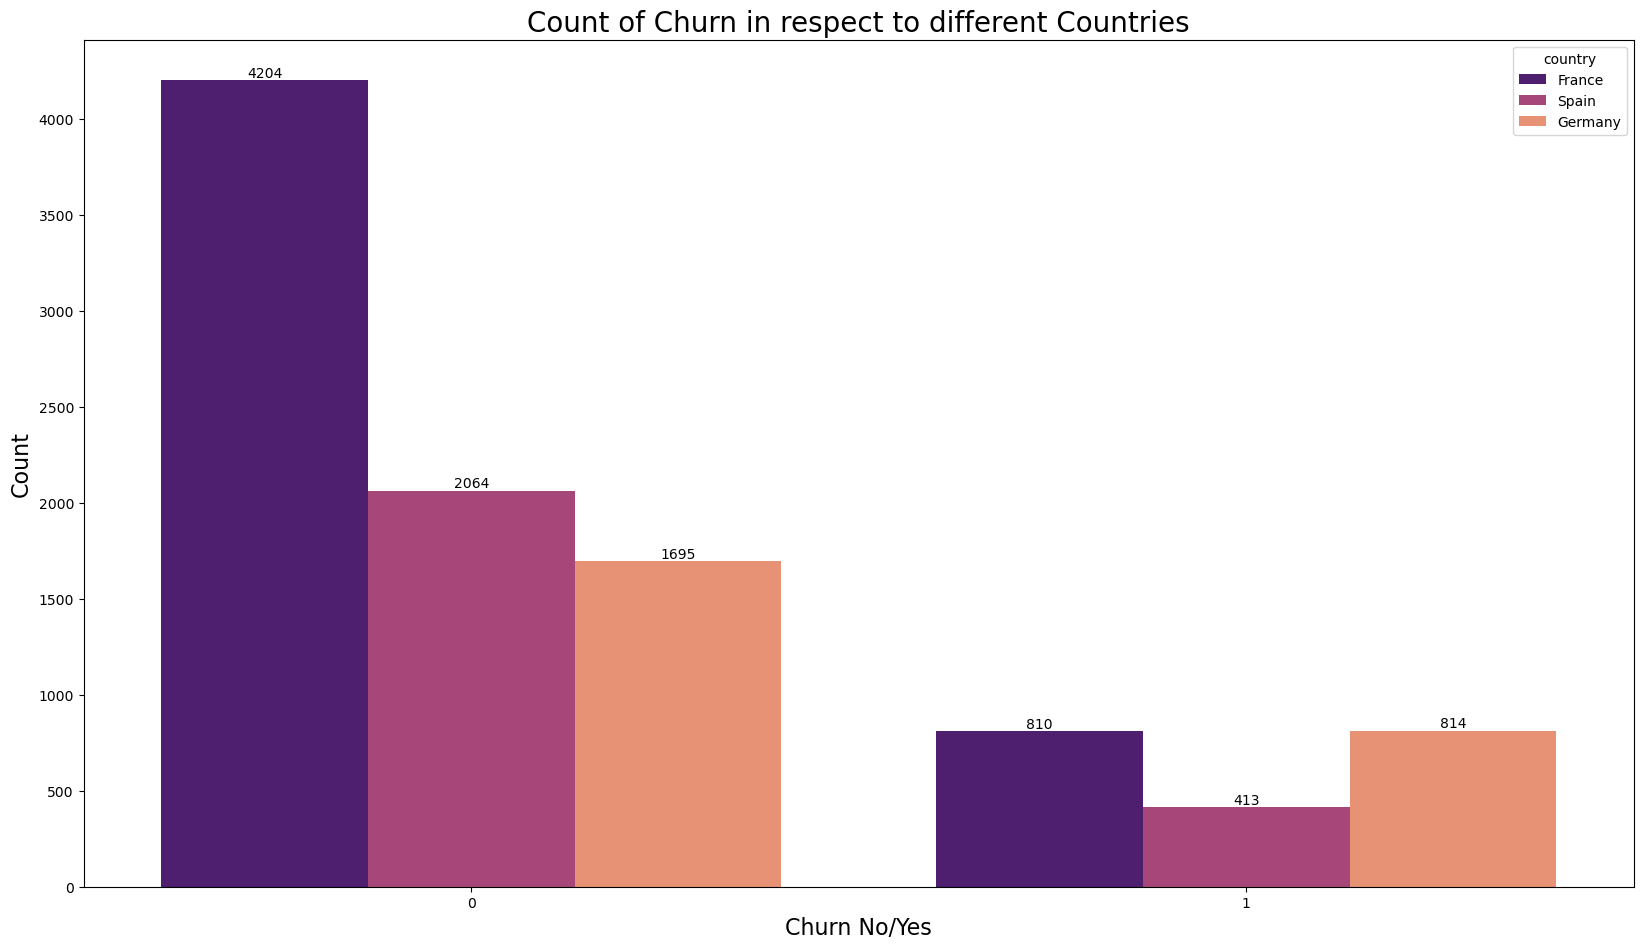

In [194]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='churn', data = df, hue = "country",palette="magma")
ax.set_xlabel(xlabel = 'Churn No/Yes', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of Churn in respect to different Countries', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

## - Above Countplot shows that Germany has the most churn rate among other countries.

## - Even though France has the most customers their churn rate is less in comparison to other countries.

## - Bank is doing not so good in Germany and doing good over France. 

# ----------------------------------------------------------------------------------------

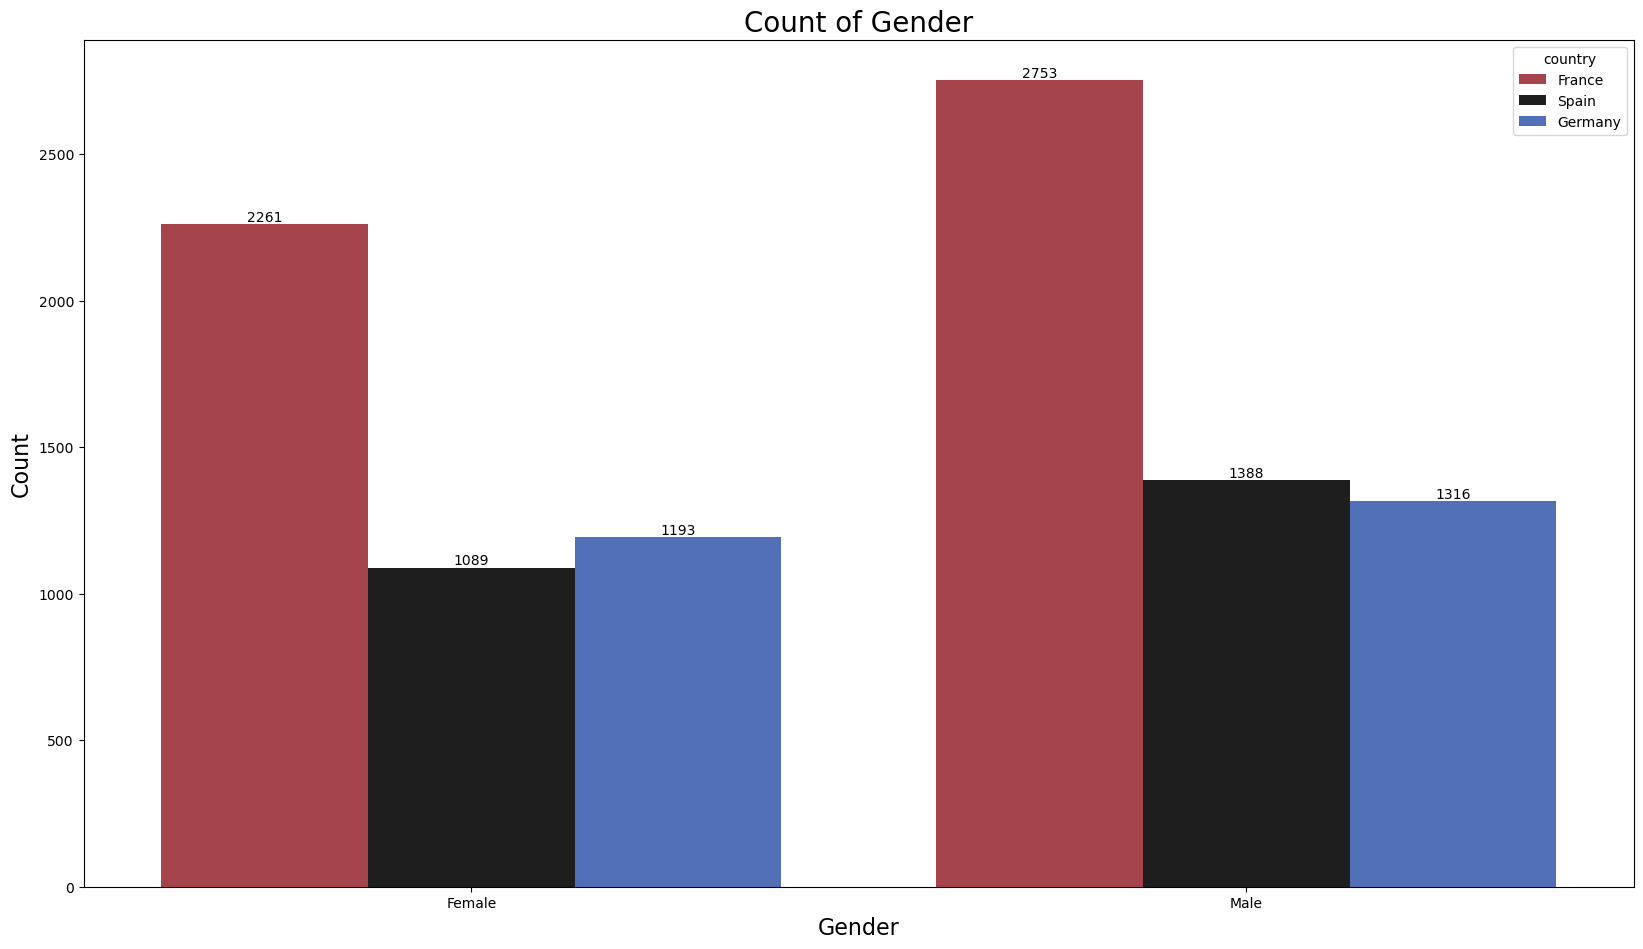

In [232]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='gender', data = df, hue = "country",palette= "icefire_r")
ax.set_xlabel(xlabel = 'Gender', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of Gender', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

## There are more male customers in general with most from France as thought of.

## Difference rate between males to number of females is almost equal in case of France and Spain, but in Germany there is very less difference between number of males to females. 

## Germany is doing good in terms of maintaining gender equality in customers.

# ----------------------------------------------------------------------------------------

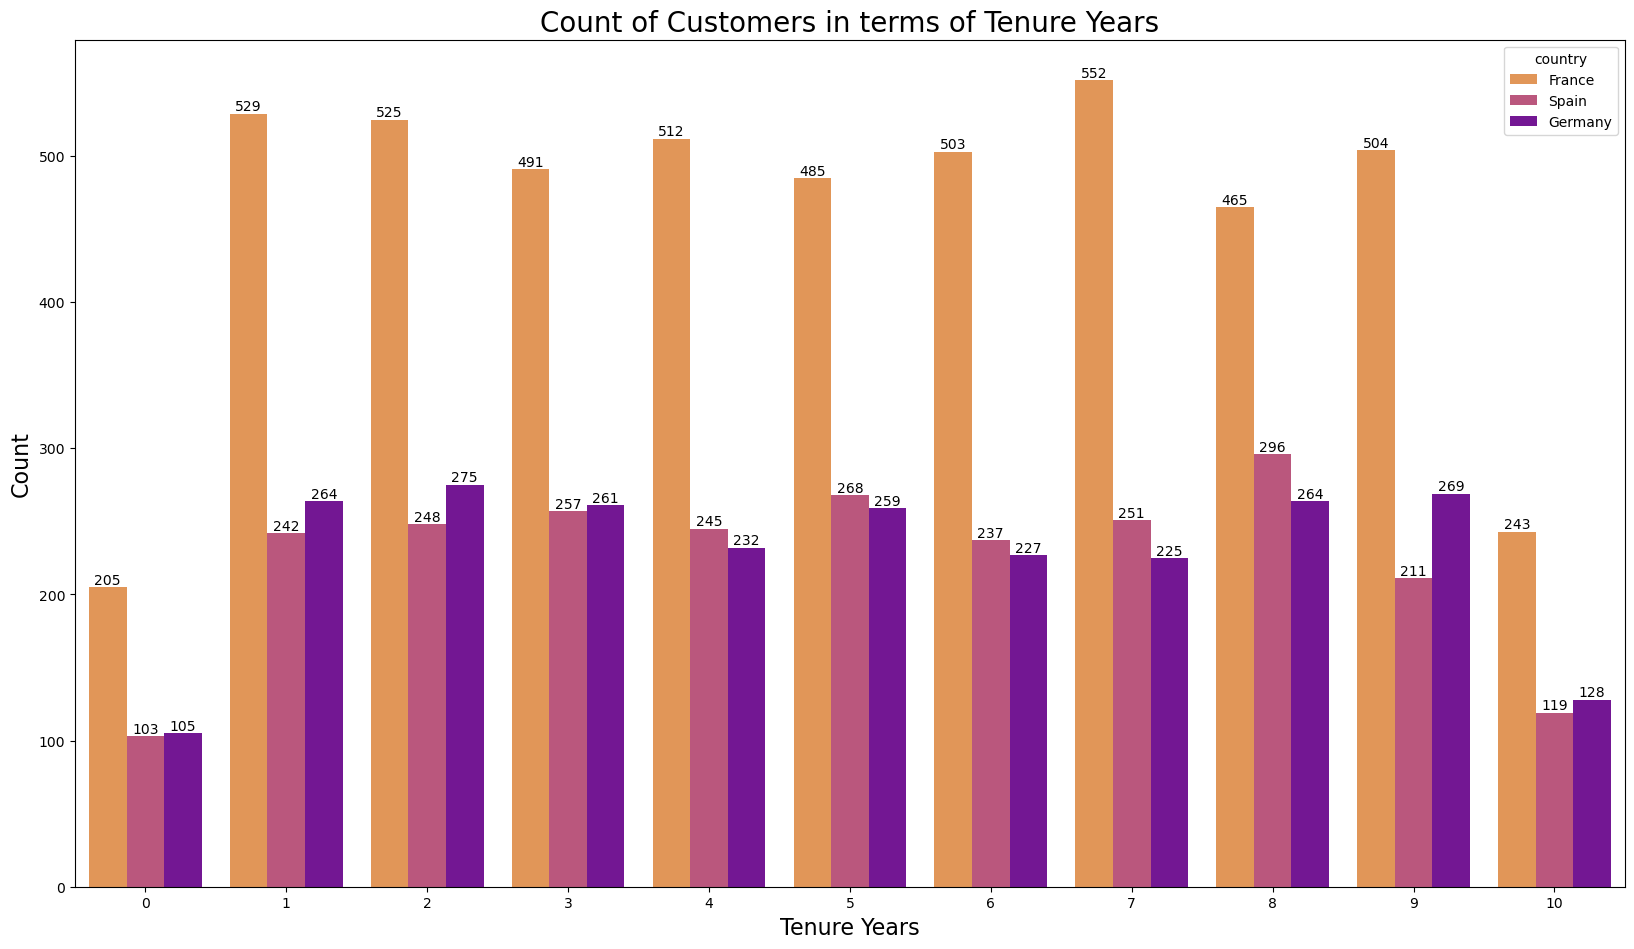

In [229]:
plt.figure(figsize = (20, 11))
ax = sns.countplot(x ='tenure', data = df, hue = "country",palette= "plasma_r") 
ax.set_xlabel(xlabel = 'Tenure Years', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Count of Customers in terms of Tenure Years', fontsize = 20)
for i in ax.containers:
    ax.bar_label(i)

## Above Countplot shows count of customers in terms of different tenure years.

# ----------------------------------------------------------------------------------------

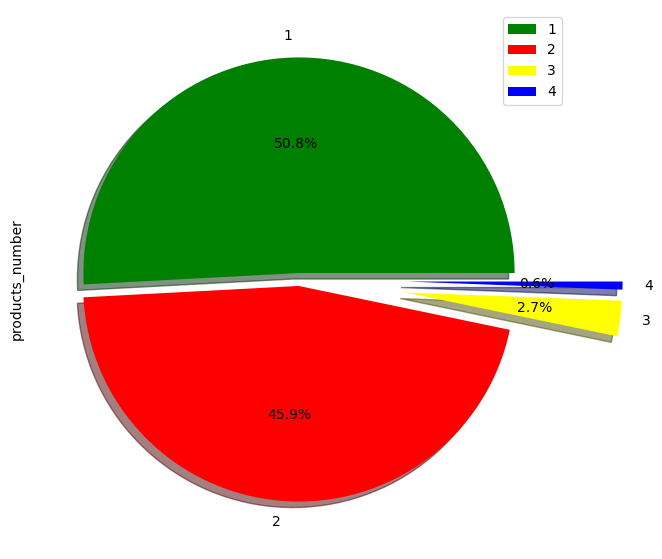

In [240]:
plt.figure(figsize= (7,7))
colors = ['green', 'red', 'yellow', 'blue']
explode = (0.03, 0.03, 0.50, 0.50)
df['products_number'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.legend()

## - Above pie chart shows that Customers mostly choose Either product number 1 or 2.

## - Very less amount of customers choose product 3 and 4, with 4 having the least percentage.

# ----------------------------------------------------------------------------------------

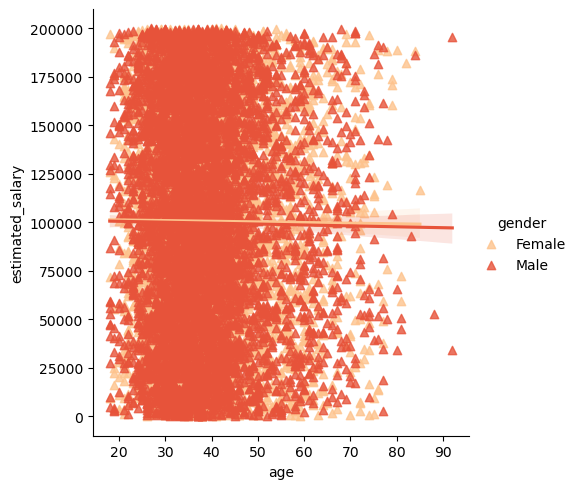

In [262]:
sns.lmplot(x='age', y='estimated_salary', data=df, markers="^", hue="gender", palette="OrRd")

## - Estimated Salary is proportionately divided among different age groups with some                       outliers.

## - Estimated Salary slightly drops for males as they age in comparison to females. 

# -----------------------------------------------------------------------------------------

<Axes: xlabel='country', ylabel='estimated_salary'>

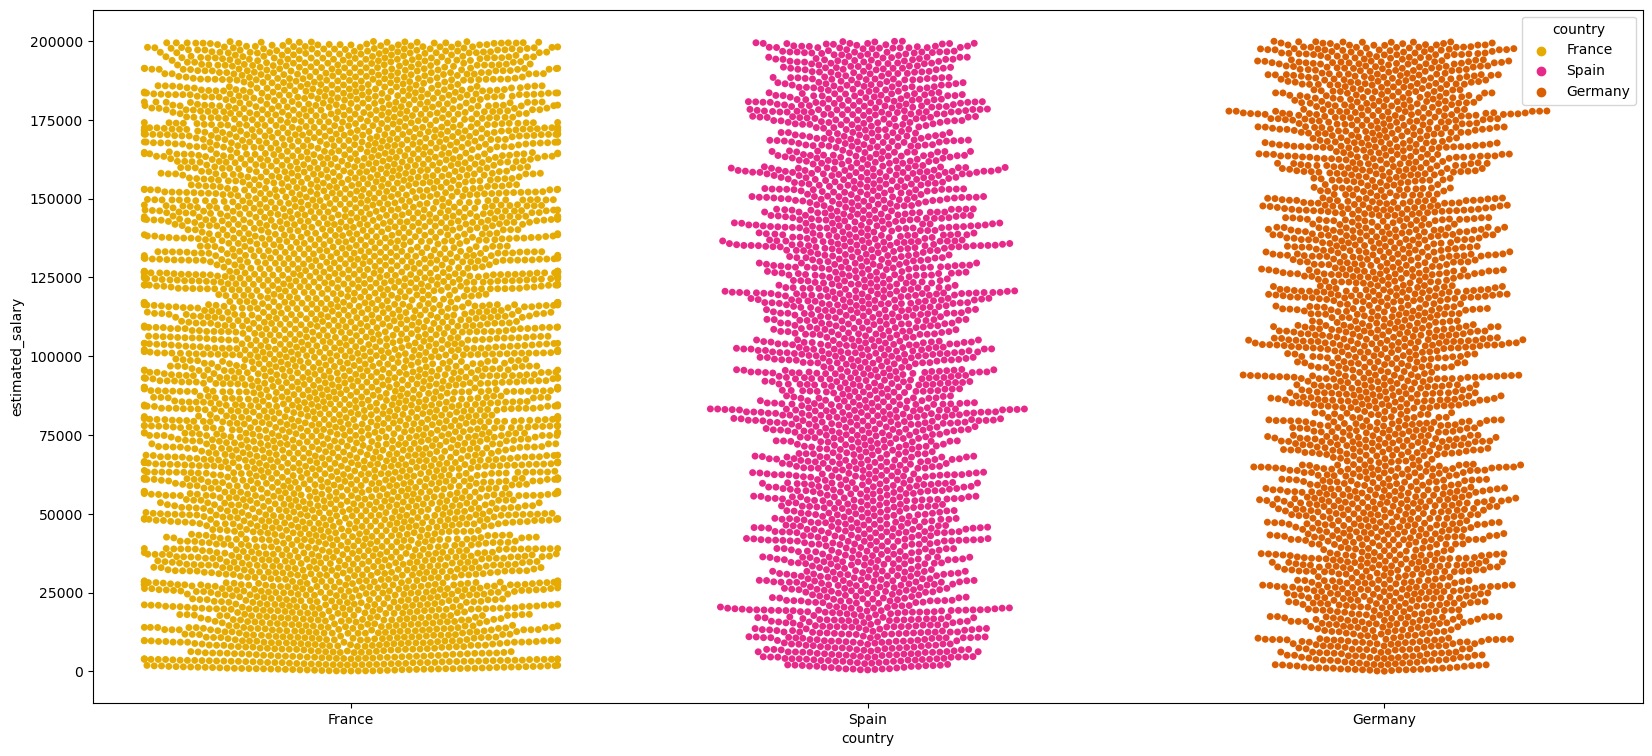

In [253]:
plt.figure(figsize=(20, 9))
sns.swarmplot(x="country", y="estimated_salary", data=df, hue='country', palette="Dark2_r")

## - Above swarmplot shows how estimated salary is spread apart in terms of dfferent countries.

## - France has the biggest swarm in terms of estimated salary.

## - Germany has better spread than Spain.

# ----------------------------------------------------------------------------------------

<Axes: xlabel='gender', ylabel='estimated_salary'>

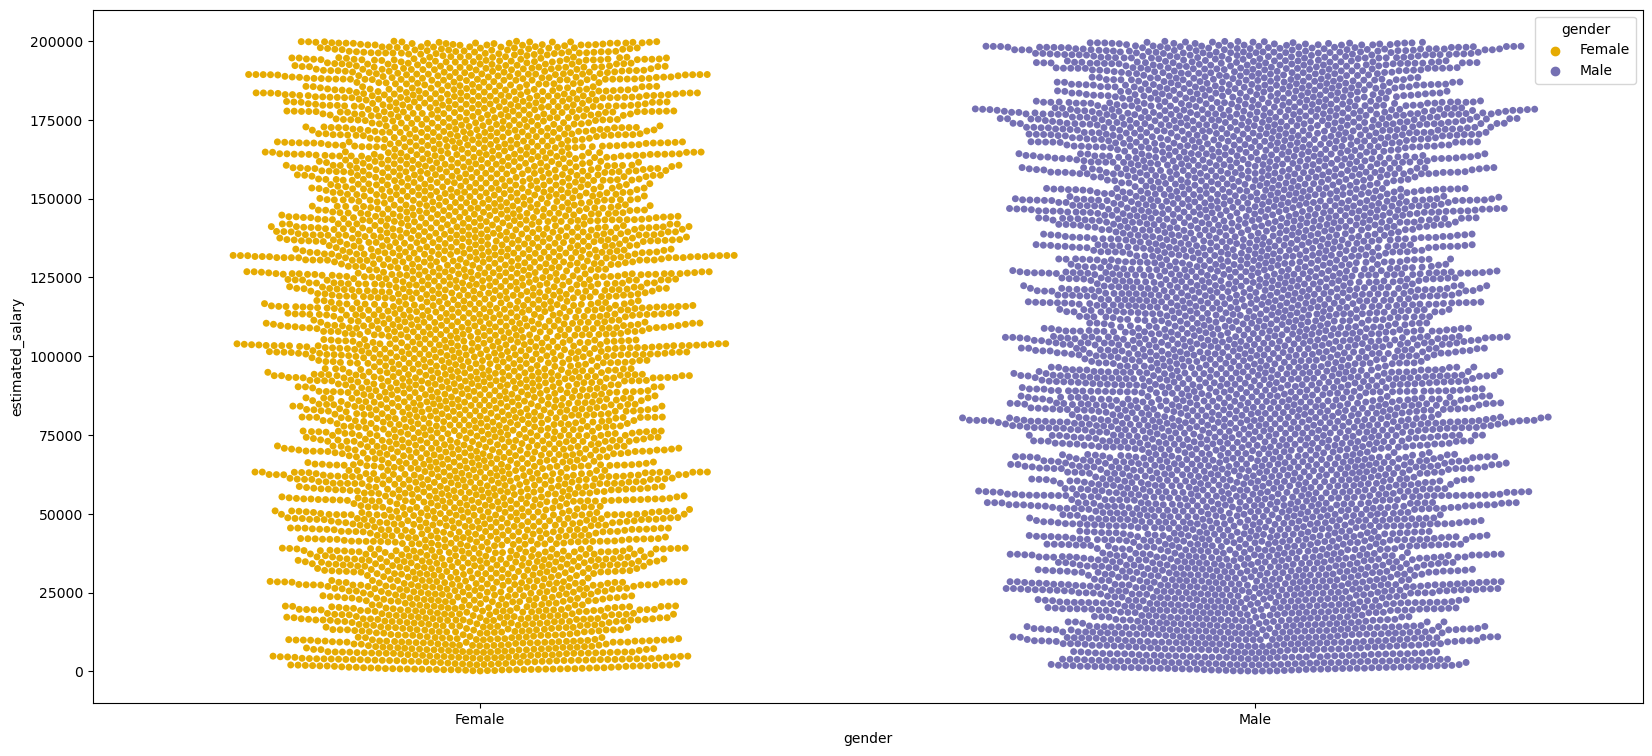

In [264]:
plt.figure(figsize=(20, 9))
sns.swarmplot(x="gender", y="estimated_salary", data=df, hue='gender', palette="Dark2_r")

## Above Swarmplot shows estimated salary in terms of both the genders. 

# ----------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Gender wise Estimated Salary')

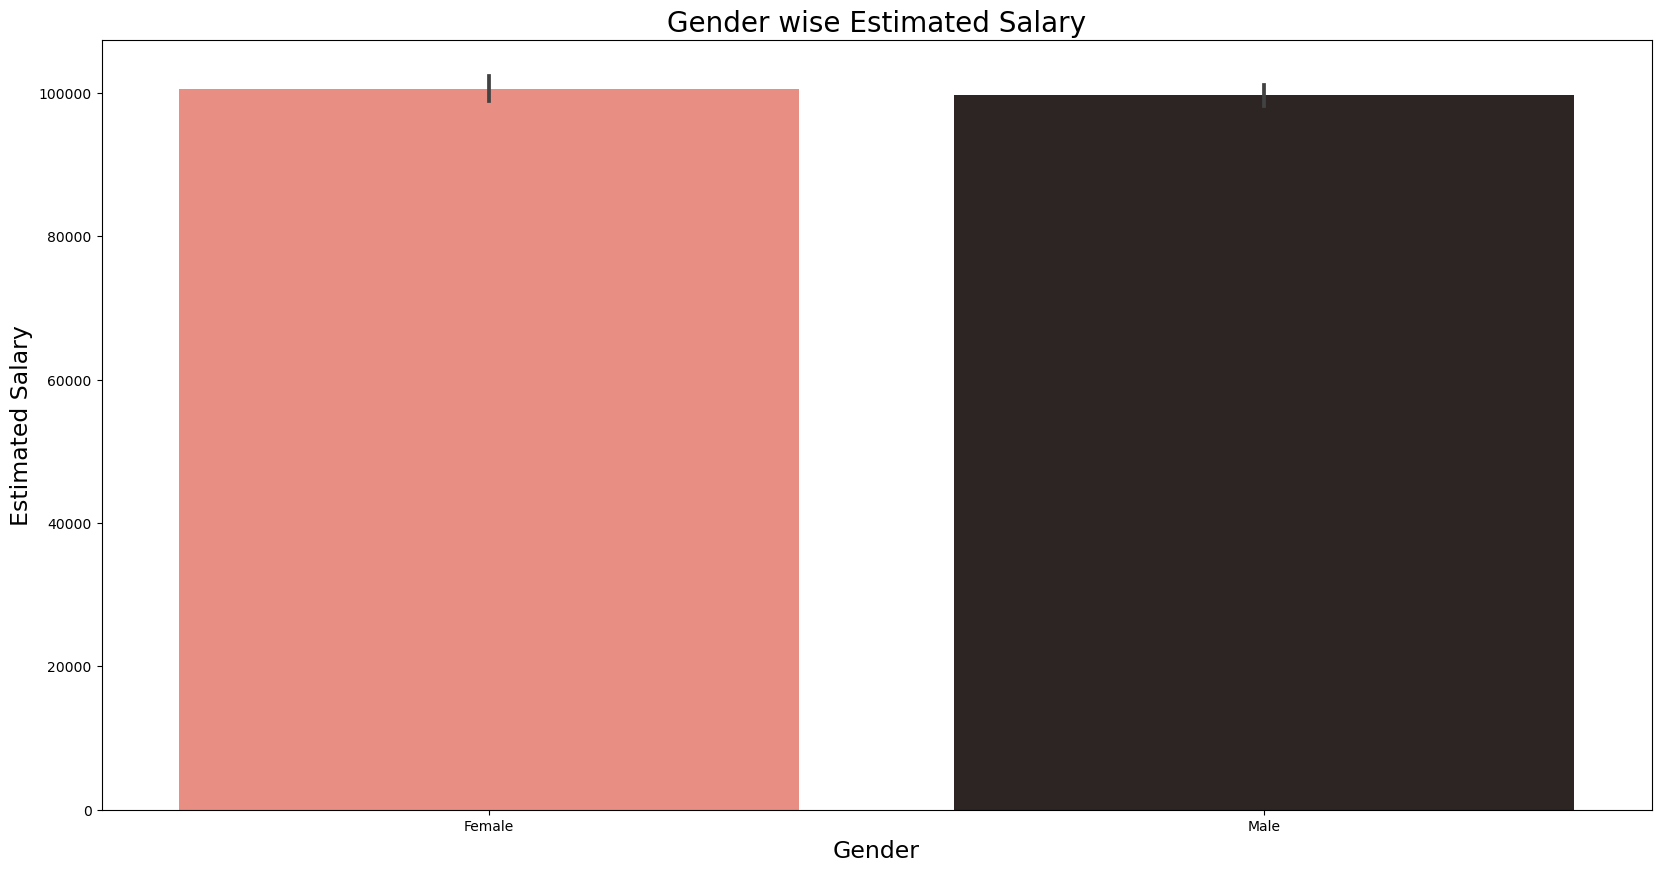

In [268]:
plt.figure(figsize= (20,10))
ax = sns.barplot(x ='gender', y = 'estimated_salary', data=df, palette = 'dark:salmon_r')
ax.set_xlabel(xlabel = 'Gender', fontsize = 17)
ax.set_ylabel(ylabel = 'Estimated Salary', fontsize = 17)
ax.set_title(label = 'Gender wise Estimated Salary', fontsize = 20) 

## - Above barplot shows Females have slightly more estimated salary than males.

## - Even though the number of males are higher, the above bar plot shows something different.

# -----------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Gender wise Credit Score')

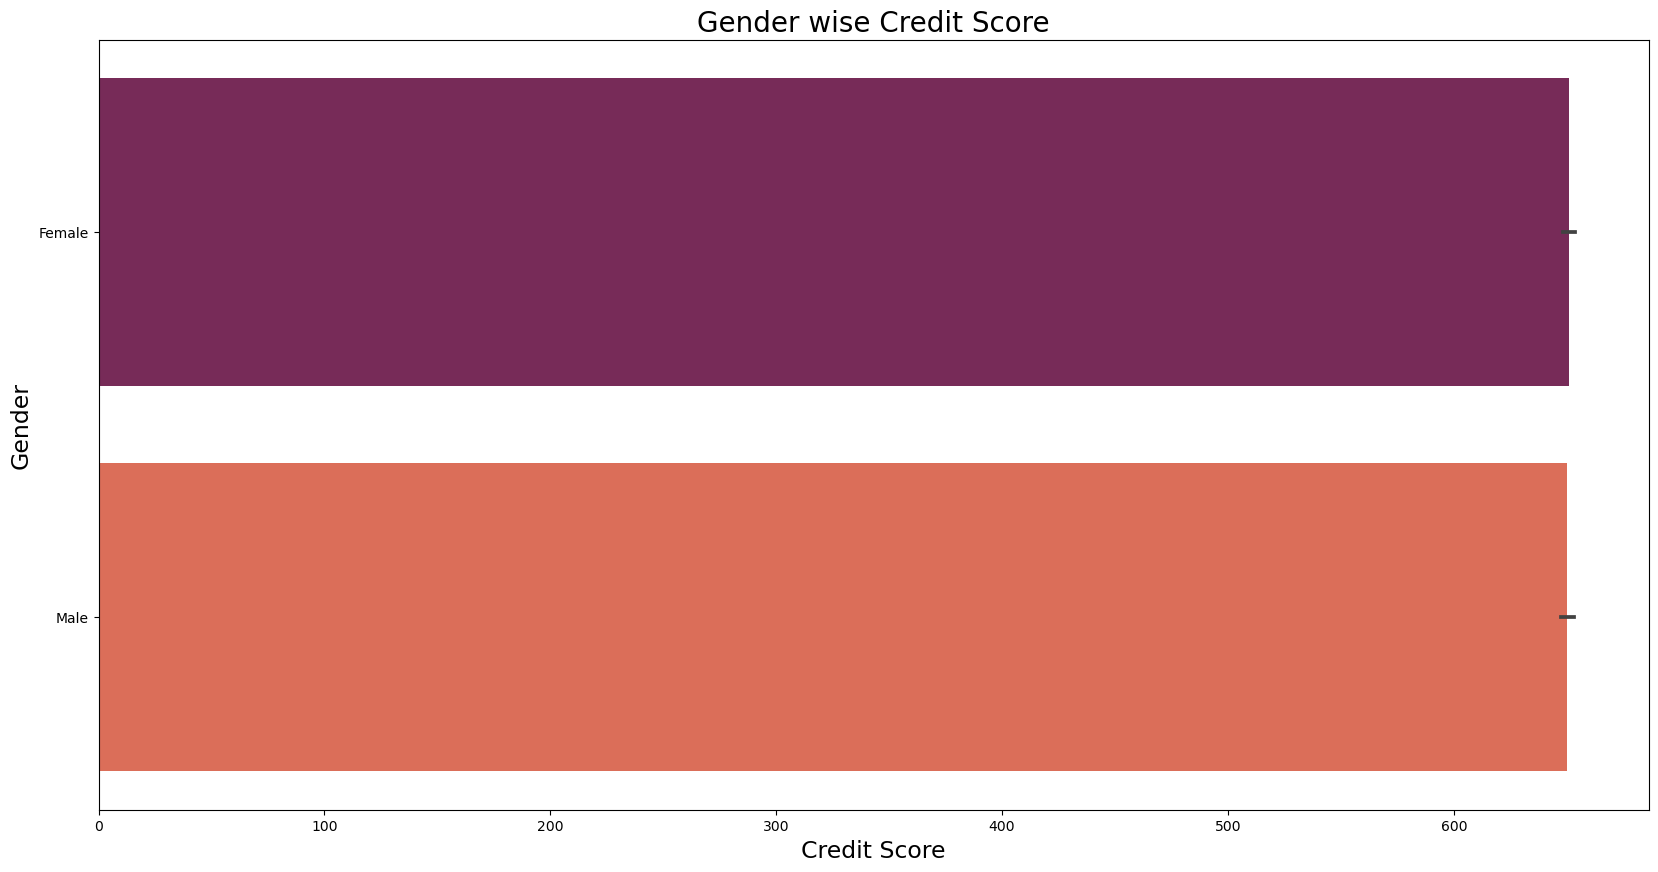

In [270]:
plt.figure(figsize= (20,10))
ax = sns.barplot(x ='credit_score', y = 'gender', orient='h', data=df, palette = 'rocket')
ax.set_xlabel(xlabel = 'Credit Score', fontsize = 17)
ax.set_ylabel(ylabel = 'Gender', fontsize = 17)
ax.set_title(label = 'Gender wise Credit Score', fontsize = 20) 

## Above barplot shows Credit score of both the genders are the same over 600.

## -------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Country wise Estimated Salary')

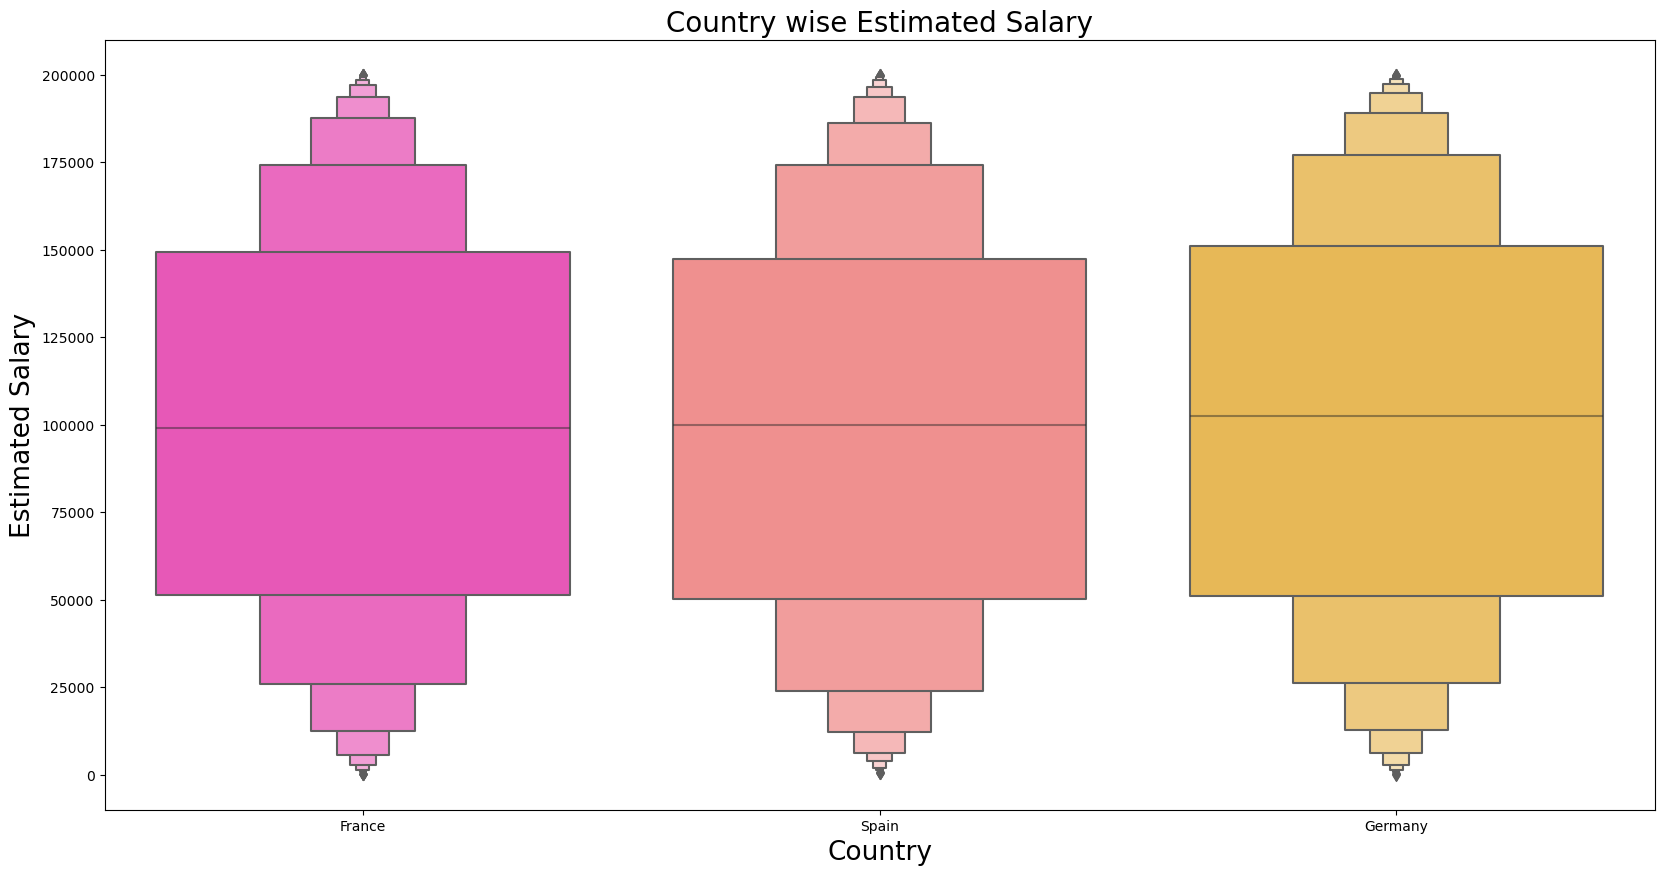

In [277]:
plt.figure(figsize = (20,10))
ax = sns.boxenplot(x = 'country' , y = 'estimated_salary' , data = df, palette='spring')
ax.set_xlabel(xlabel = 'Country', fontsize = 19)
ax.set_ylabel(ylabel = 'Estimated Salary', fontsize = 19)
plt.title('Country wise Estimated Salary', fontsize = 20)

## - Above boxenplot shows all countries are producing the same boxenplot in terms of estimated salary.

## - Most of the estimated salary lies between 50000 - 150000 in all three countries.

## -------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Country wise Credit Score')

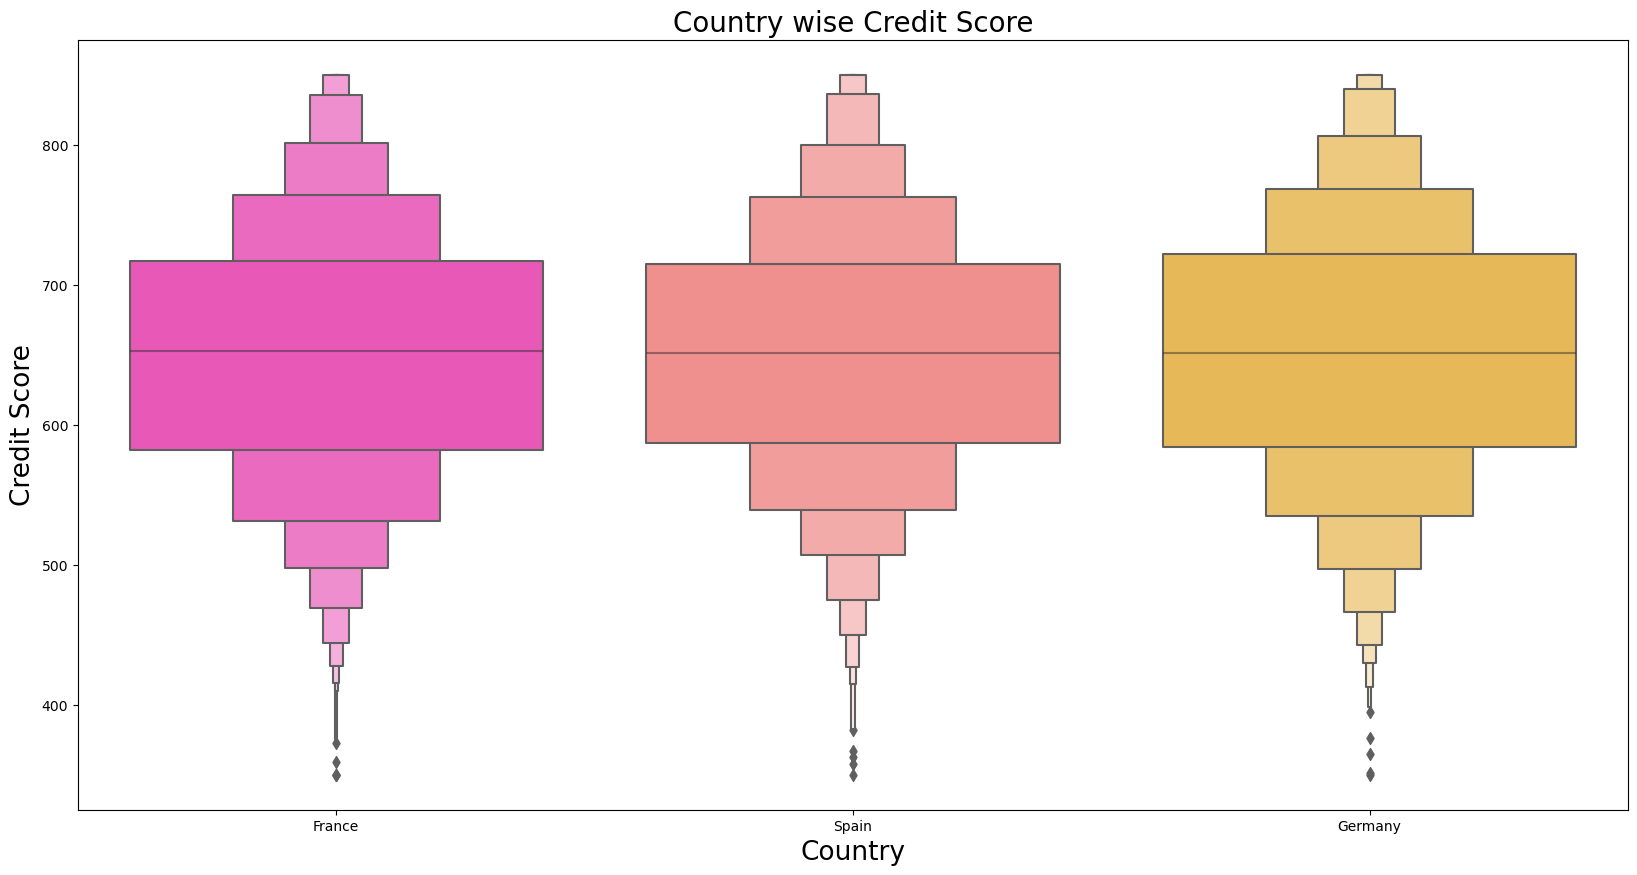

In [279]:
plt.figure(figsize = (20,10))
ax = sns.boxenplot(x = 'country' , y = 'credit_score' , data = df, palette='spring')
ax.set_xlabel(xlabel = 'Country', fontsize = 19)
ax.set_ylabel(ylabel = 'Credit Score', fontsize = 19)
plt.title('Country wise Credit Score', fontsize = 20)

## - Above boxenplot shows all countries are producing similar plot in terms of credit scores.

## - Most of the credit score lies between 580 - 710 approximately.

## - Outliers are present differently for each country. 

![](https://media.tenor.com/7Ypq9_9najcAAAAd/thumbs-up-double-thumbs-up.gif)


## ---------------------------------------------------------------------------------------------------------

# Modelling

In [106]:
le = preprocessing.LabelEncoder()

In [107]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

In [108]:
print('Categorical columns:', categorical_cols)

Categorical columns: ['country', 'gender']


In [109]:
col_list = ['country', 'gender']

In [110]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

In [111]:
df

credit_score  country  gender  age  tenure  products_number  \
0              619        0       0   42       2                1   
1              608        2       0   41       1                1   
2              502        0       0   42       8                3   
3              699        0       0   39       1                2   
4              850        2       0   43       2                1   
...            ...      ...     ...  ...     ...              ...   
9995           771        0       1   39       5                2   
9996           516        0       1   35      10                1   
9997           709        0       0   36       7                1   
9998           772        1       1   42       3                2   
9999           792        0       0   28       4                1   

      credit_card  active_member  estimated_salary  churn  
0               1              1         101348.88      1  
1               0              1         112542.58      0  
2               1              0         113931.57      1  
3               0              0          93826.63      0  
4               1              1          79084.10      0  
...           ...            ...               ...    ...  
9995            1              0          96270.64      0  
9996            1              1         101699.77      0  
9997            0              1          42085.58      1  
9998            1              0          92888.52      1  
9999            1              0          38190.78      0  

[10000 rows x 10 columns]

In [112]:
X = df.drop('estimated_salary', axis = 1)
y = df['estimated_salary']

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.45)

In [114]:
clf = DecisionTreeRegressor(min_samples_split=250)

In [115]:
clf = clf.fit(X_train, y_train)

In [116]:
clf

DecisionTreeRegressor(min_samples_split=250)

[Text(0.27, 0.98, 'x[0] <= 409.0\nsquared_error = 3341688998.793\nsamples = 5500\nvalue = 99810.388'),
 Text(0.23, 0.94, 'squared_error = 2100962647.751\nsamples = 15\nvalue = 141331.809'),
 Text(0.31, 0.94, 'x[0] <= 434.5\nsquared_error = 3340354403.909\nsamples = 5485\nvalue = 99696.838'),
 Text(0.27, 0.9, 'squared_error = 2533675628.779\nsamples = 53\nvalue = 81458.059'),
 Text(0.35, 0.9, 'x[0] <= 511.5\nsquared_error = 3344947802.687\nsamples = 5432\nvalue = 99874.793'),
 Text(0.18, 0.86, 'x[5] <= 1.5\nsquared_error = 3289233778.54\nsamples = 381\nvalue = 106615.057'),
 Text(0.14, 0.82, 'squared_error = 3408101046.65\nsamples = 185\nvalue = 99819.965'),
 Text(0.22, 0.82, 'squared_error = 3092319727.801\nsamples = 196\nvalue = 113028.792'),
 Text(0.52, 0.86, 'x[0] <= 605.5\nsquared_error = 3345464952.754\nsamples = 5051\nvalue = 99366.371'),
 Text(0.3, 0.82, 'x[0] <= 559.5\nsquared_error = 3290509755.383\nsamples = 1332\nvalue = 96480.16'),
 Text(0.2, 0.78, 'x[0] <= 553.5\nsquared_e

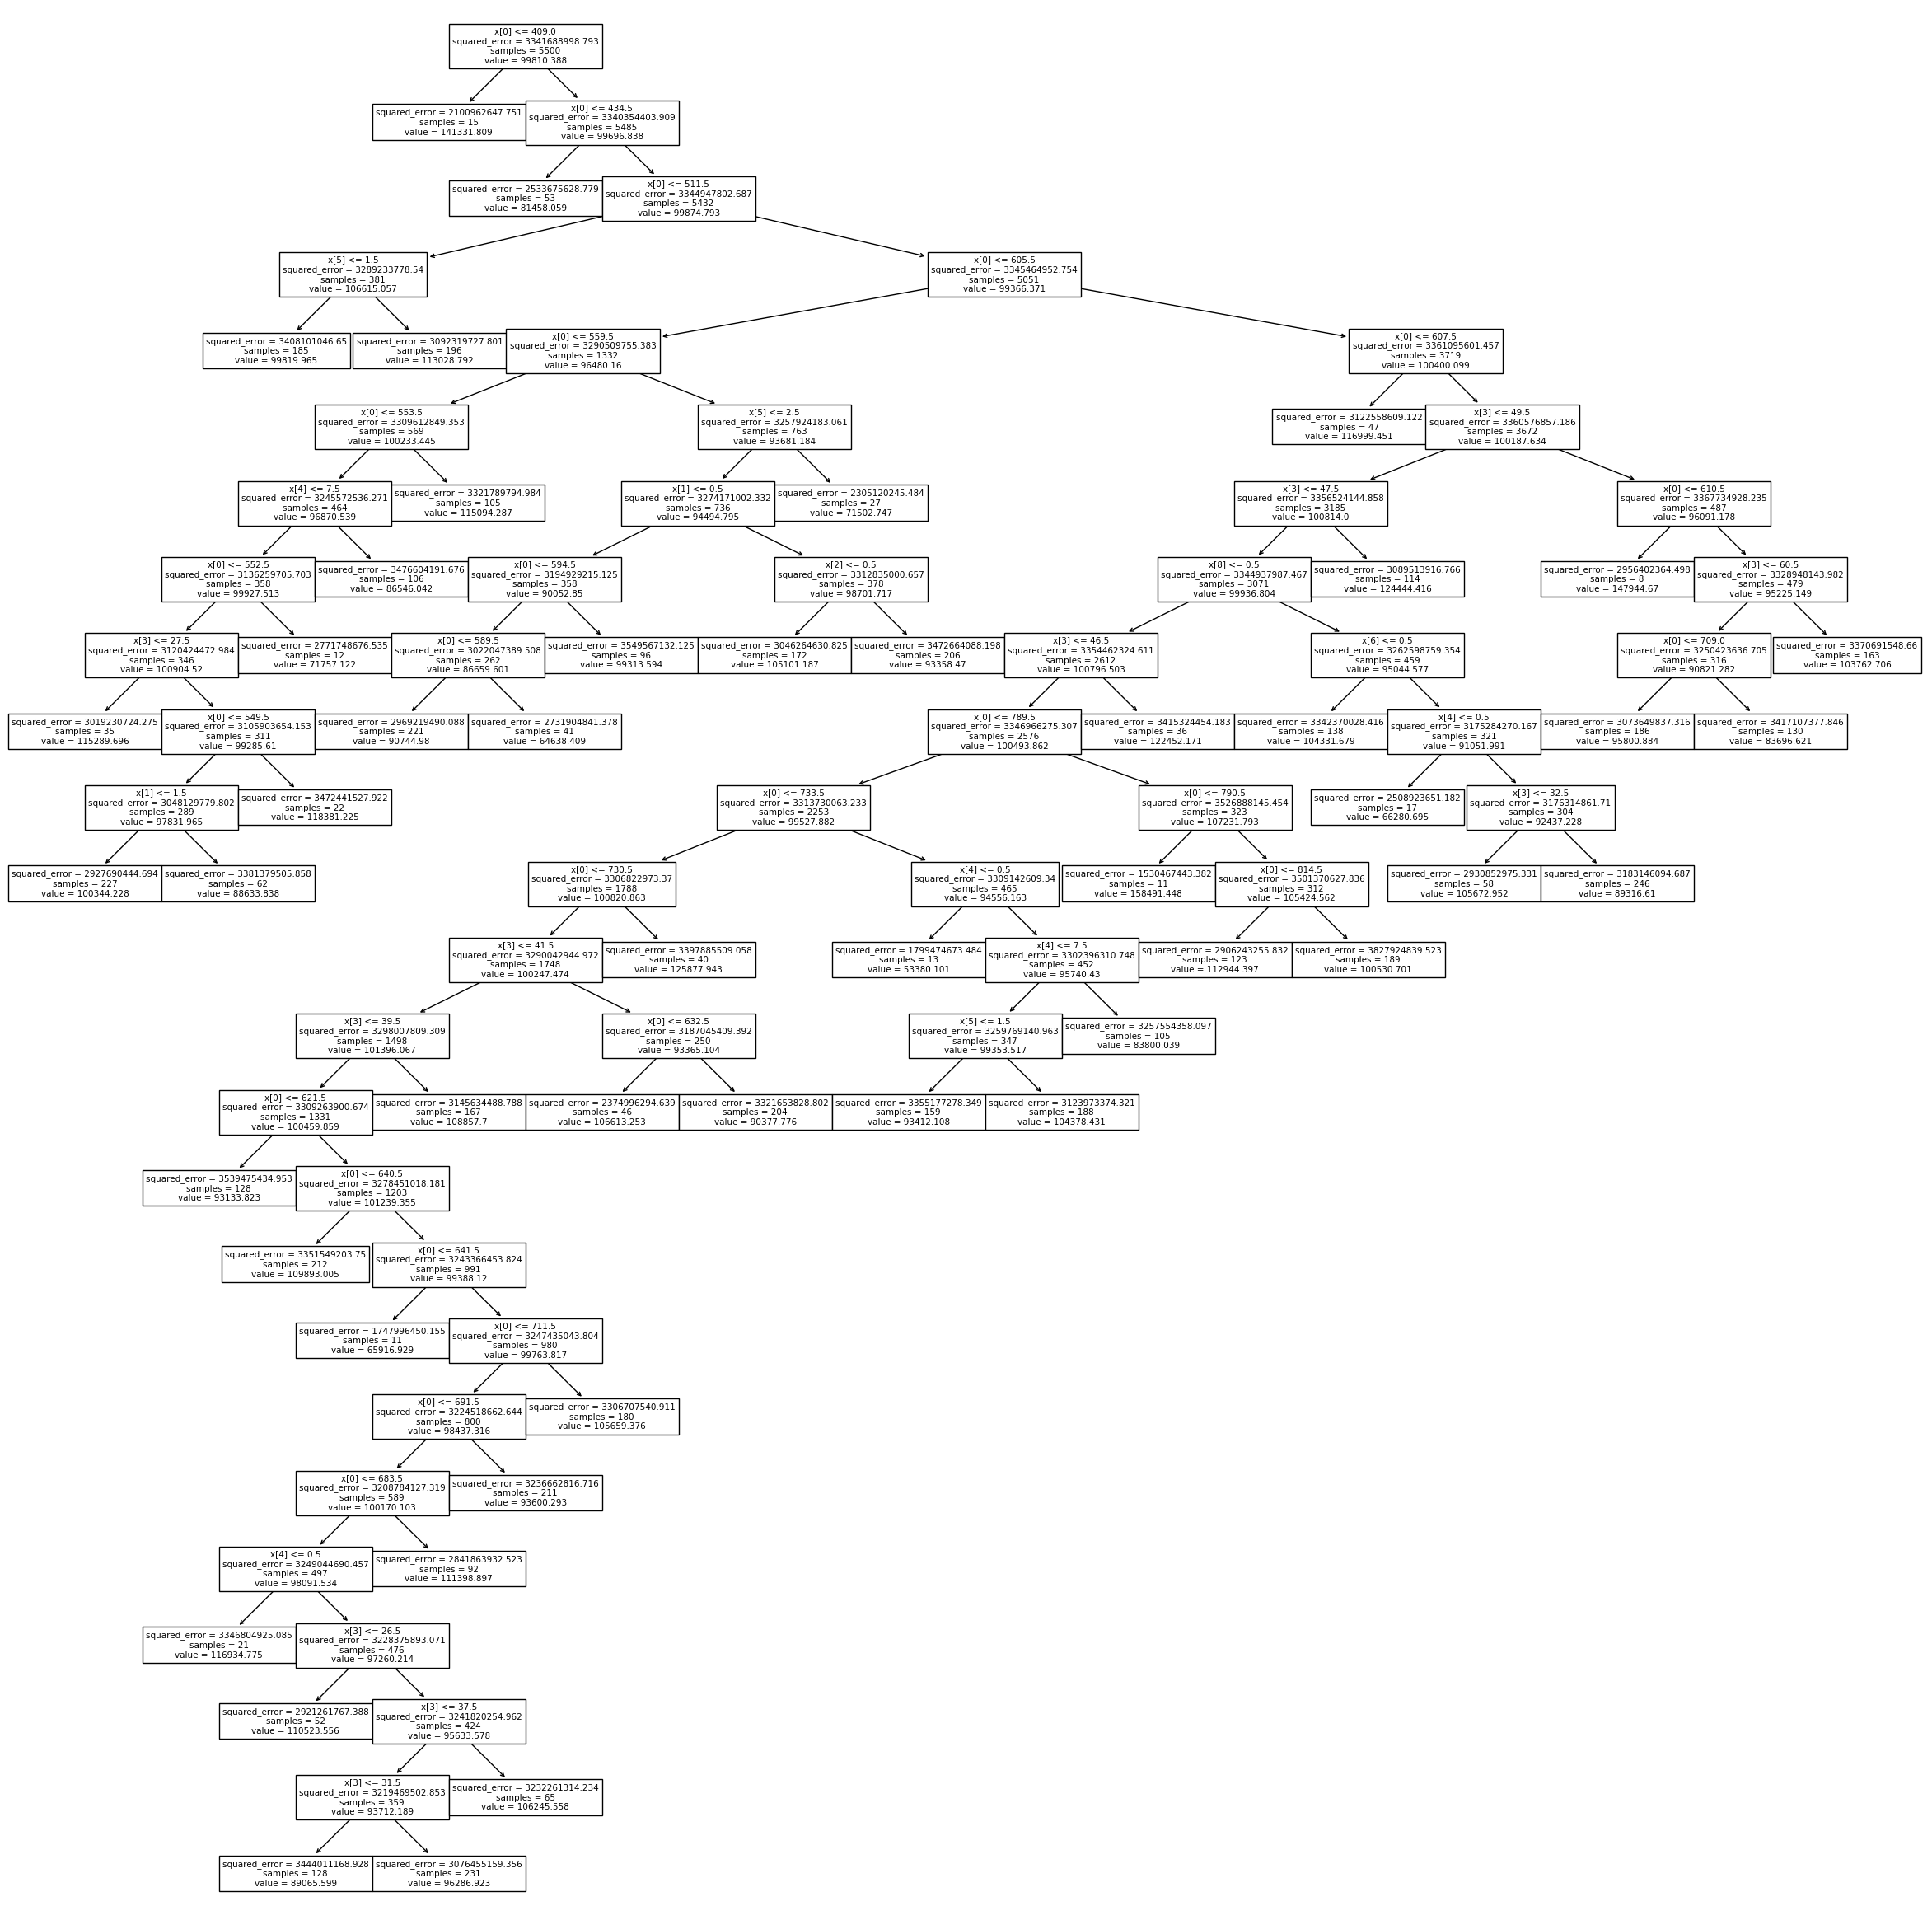

In [117]:
plt.figure(figsize = (30,30))
tree.plot_tree(clf)

## Looking at the MSE score of training data 

In [118]:
y_pred_train_clf = clf.predict(X_train)
mean_squared_error(y_train,y_pred_train_clf)

3204714312.901311

In [119]:
mse_train_clf = mean_squared_error(y_train,y_pred_train_clf)

In [120]:
import math
rmse_train_clf = math.sqrt(mse_train_clf)
print("RMSE:", rmse_train_clf)

RMSE: 56610.19619204045


In [121]:
r2_score(y_train,y_pred_train_clf)

0.040989657009207425

## Looking at the MSE score of testing data

In [122]:
y_pred_test_clf = clf.predict(X_test)

In [123]:
mean_squared_error(y_test,y_pred_test_clf)

3385005685.776815

In [124]:
mse_test_clf = mean_squared_error(y_test,y_pred_test_clf)

In [125]:
import math
rmse_test_clf = math.sqrt(mse_test_clf)
print("RMSE:", rmse_test_clf)

RMSE: 58180.80169417413


In [126]:
r2_score(y_test,y_pred_test_clf)

-0.0368600777150192

## Multiple linear regression begins

In [130]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [131]:
y_pred_train_lr = lr.predict(X_train)

In [132]:
y_pred_test_lr = lr.predict(X_test)

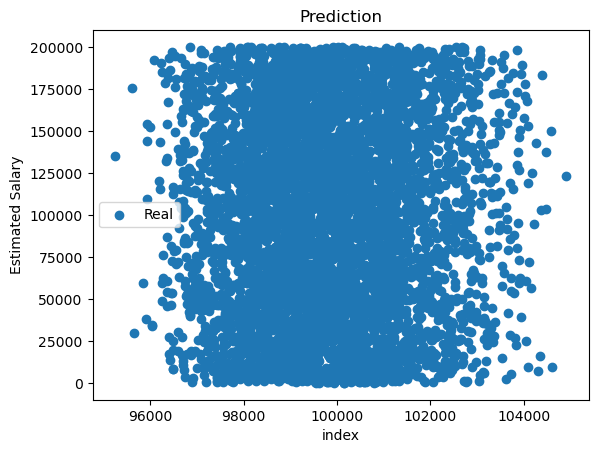

In [133]:
plt.xlabel('index')
plt.ylabel('Estimated Salary')
plt.title('Prediction')
plt.scatter(y_pred_train_lr,y_train)
plt.legend(["Real", "Predicted"])

## Plotting the predictions of the real values in y_test and the predicted y_test values of the lr model.

In [134]:
x_range = [i for i in range(len(y_test))]

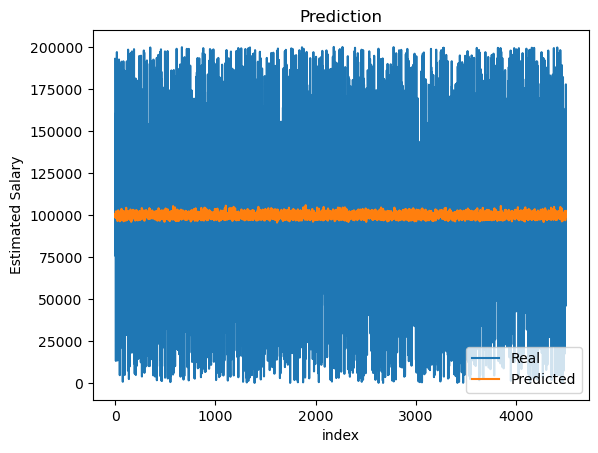

In [135]:
plt.xlabel('index')
plt.ylabel('Estimated Salary')
plt.title('Prediction')

plt.plot(x_range,y_test)
plt.plot(x_range,y_pred_test_lr)

# Function add a legend  
plt.legend(["Real", "Predicted"])

## Plotting the predictions for testing data


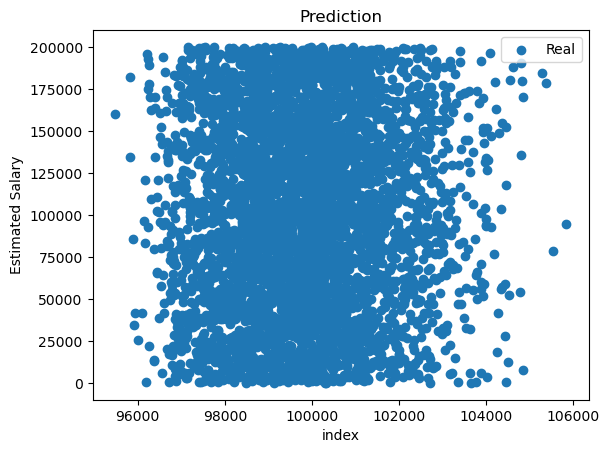

In [136]:
plt.xlabel('index')
plt.ylabel('Estimated Salary')
plt.title('Prediction')

plt.scatter(y_pred_test_lr,y_test)


# Function add a legend  
plt.legend(["Real", "Predicted"])

## Looking at the MSE score of training data

In [137]:
mean_squared_error(y_train,y_pred_train_lr)

3339155963.8465157

In [138]:
mse_train_lr=mean_squared_error(y_train,y_pred_train_lr)

In [139]:
import math
rmse_train_lr = math.sqrt(mse_train_lr)
print("RMSE:", rmse_train_lr)

RMSE: 57785.4303769256


In [140]:
r2_score(y_train,y_pred_train_lr)

0.0007580103796879234

## Looking at the MSE score of testing data

In [141]:
mean_squared_error(y_test,y_pred_test_lr)

3264460901.9168115

In [142]:
mse_test_lr=mean_squared_error(y_test,y_pred_test_lr)

In [143]:
import math
rmse_test_lr = math.sqrt(mse_test_lr)
print("RMSE:", rmse_test_lr)

RMSE: 57135.460984548045


In [144]:
r2_score(y_test,y_pred_test_lr)

6.395892291055638e-05

## Checking the score for our model


In [145]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)

In [146]:
train_accuracy

0.0007580103796879234

In [281]:
test_accuracy

6.395892291055638e-05

![](https://media3.giphy.com/media/bOwOAey4MDO3ivBkgK/giphy.gif?cid=ecf05e472kftnbvecfxnc0h8uc77vdg5sp84h2imv7olfhbb&ep=v1_gifs_search&rid=giphy.gif&ct=g)
